In [1]:
# Parameters
config = {
    "notebook": "notebooks/tfi_sin_FeatureEngenieering.ipynb",
    "data_path": "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trawlers.csv",
    "output_label": "trawlers",
}


In [2]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv",
    }
print(config)

{'notebook': 'notebooks/tfi_sin_FeatureEngenieering.ipynb', 'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trawlers.csv', 'output_label': 'trawlers'}


In [3]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.1.
The scikit-learn version is 1.0.2.


Cargamos el dataset.

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

trollers = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')

#Nos quedamos solo con las columnas que estan clasificadas 100% como pescando, o no pescando. Que no haya duda.
df = trollers.copy()
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')
trollers = df.copy()
#print(trollers)

Dropeamos los NA, y nos quedamos con los puntos que se encuentran a 3 millas de la costa.

In [5]:
#Dropeamos NA.
df = df.dropna()
#Generamos Feature Engeniering.
df = df[(df['distance_from_shore'] >= 5556)]
#print(len(df))
#Dropeamos columnas que no interesen en el modelo.

trollers = df.copy()

In [6]:
df.groupby('is_fishing').head(3)


mmsi     timestamp  distance_from_shore  distance_from_port  \
242    1.252340e+12  1.325682e+09        826520.687500       855189.500000   
784    1.252340e+12  1.327070e+09        826520.687500       855189.500000   
1117   1.252340e+12  1.327374e+09        668776.562500       676221.500000   
61285  1.252340e+12  1.420898e+09          5999.852539        32556.841797   
61286  1.252340e+12  1.420899e+09          7615.586426        36795.835938   
61287  1.252340e+12  1.420900e+09          5656.715332        39697.894531   

       speed  course        lat       lon is_fishing source  
242      0.0    33.0 -13.951197  4.580761         NO    gfw  
784      0.0   194.0 -13.951197  4.580761         NO    gfw  
1117     0.0    28.0 -13.951197  0.006895         NO    gfw  
61285    8.2    45.0  58.295586 -6.163733         SI    gfw  
61286    5.2    51.0  58.306934 -6.140050         SI    gfw  
61287    5.0    35.0  58.319519 -6.129850         SI    gfw

In [7]:

def n_prior_to_condition(df, n, condition):
    groups = condition.iloc[::-1].cumsum()
    return df.groupby(groups).tail(n+1)[:15000]

df = trollers
aux = df.copy()

for i in range(1,10000):
    aux = n_prior_to_condition(df, i, df.is_fishing=="SI")  
    aux = aux.drop_duplicates()
    yes = (len(aux[aux['is_fishing']=='SI']))
    no = (len(aux[aux['is_fishing']=='NO']))
    if (yes/no<=1):
        df=aux
        break
print(i)
print(len(df[df['is_fishing']=='SI']))
print((len(df[df['is_fishing']=='NO'])))
print(df)
#print(len(new_df[new_df['is_fishing']=='SI']))
#print(len(new_df[new_df['is_fishing']=='NO']))

100
7479
7521
                 mmsi     timestamp  distance_from_shore  distance_from_port  \
59540    1.252340e+12  1.419255e+09         11180.065430        20247.960938   
59541    1.252340e+12  1.419256e+09         11704.412109        19234.912109   
59542    1.252340e+12  1.419256e+09         11704.412109        19234.912109   
59543    1.252340e+12  1.419257e+09         12648.800781        20124.117188   
59544    1.252340e+12  1.419258e+09         13601.137695        21023.279297   
...               ...           ...                  ...                 ...   
1194650  1.867463e+14  1.450590e+09         45275.812500       130966.250000   
1194651  1.867463e+14  1.450591e+09         43265.554688       132544.859375   
1194652  1.867463e+14  1.450592e+09         41616.285156       134060.125000   
1194653  1.867463e+14  1.450593e+09         42010.871094       132906.484375   
1194654  1.867463e+14  1.450594e+09         40998.992188       133056.875000   

         speed      cours

In [8]:
import plotly.express as px
import pandas as pd

fig = px.line_geo(df,lat='lat',lon='lon', hover_name="speed", color='is_fishing',line_group='mmsi',markers=True)
fig.update_layout(title = 'asd', title_x=0.5,mapbox_style="open-street-map")
fig.show()


In [9]:
df = df.drop(['mmsi', 'source','lat', 'lon','timestamp','source'], axis = 1)
print(df)


         distance_from_shore  distance_from_port  speed      course is_fishing
59540           11180.065430        20247.960938    1.0  334.000000         NO
59541           11704.412109        19234.912109    1.1  294.000000         NO
59542           11704.412109        19234.912109    1.3  294.000000         NO
59543           12648.800781        20124.117188    1.6  303.000000         NO
59544           13601.137695        21023.279297    1.1  281.000000         NO
...                      ...                 ...    ...         ...        ...
1194650         45275.812500       130966.250000    4.0  340.100006         SI
1194651         43265.554688       132544.859375    3.6  335.500000         SI
1194652         41616.285156       134060.125000    3.6  324.000000         SI
1194653         42010.871094       132906.484375    4.0  302.700012         SI
1194654         40998.992188       133056.875000    3.8  294.399994         SI

[15000 rows x 5 columns]


Generamos los vectores de train y test.

In [10]:
#Generamos train y test.

#Si la longitud del dataset es mayor a 10000, partiremos agrupado por "is_fishing" ya que nos puede tocar un conjunto con is_fishing='SI' vacio.
#if len(dataset)>10000:
    #df = df.sample(n=10000, random_state=1)
#    df = df.groupby("is_fishing").sample(n=7500, random_state=1,replace=True)
#    df = df.drop_duplicates()

X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
print(len(df[df['is_fishing']=='SI']))
print(len(df[df['is_fishing']=='NO']))

7479
7521


Funcion para evaluar los modelos.

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_model(title,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    display(Markdown(title))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['NO', 'SI'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    plt.show()
    _precision_score = precision_score(y_test, y_pred,pos_label='SI')
    _recall_score = recall_score(y_test, y_pred, pos_label='SI')
    _accuracy_score = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, pos_label='SI')

    data = [["Precision","Recall","Accuracy","F1"],
            ["%.2f" % _precision_score, "%.2f" % _recall_score, "%.2f" % _accuracy_score, "%.2f" % _f1_score ]]
    table = tabulate.tabulate(data, tablefmt='html')
    display(table)
    return _precision_score, _recall_score, _accuracy_score, _f1_score


Arboles de decision optimizado

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


Train Accuracy : 0.920
Test Accuracy : 0.721
Best Score Through Grid Search : 0.703
Best Parameters :  {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}
Best Parameters :  {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}


Arboles de decision optimizado

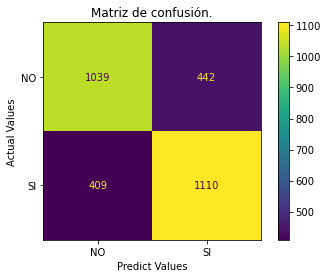

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.72     </td><td>0.73  </td><td>0.72    </td><td>0.72</td></tr>\n</tbody>\n</table>'

In [12]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#extra_tree_classifier = ExtraTreeClassifier(random_state=1)
#extra_tree_classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [11,12,13,14,15,16],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0, 0.1,0.2],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10] }

grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=3,
                    param_grid =parameters
                    )

grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], 
                            max_features=grid.best_params_['max_features'],
                            max_leaf_nodes=grid.best_params_['max_leaf_nodes'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_weight_fraction_leaf=grid.best_params_['min_weight_fraction_leaf'],
                            splitter=grid.best_params_['splitter']
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Best Parameters : ',grid.best_params_)
dt_precision_score, dt_recall_score, dt_accuracy_score, dt_f1_score = evaluate_model('Arboles de decision optimizado',y_test, y_pred)

Random forest optimizado

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


Train Accuracy : 0.969
Test Accuracy : 0.781
Best Score Through Grid Search : 0.758
Best Parameters :  {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Random forest optimizado

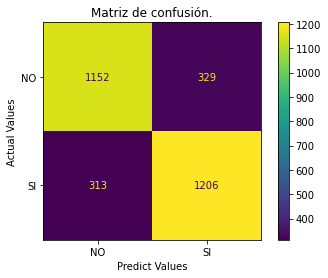

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.79     </td><td>0.79  </td><td>0.79    </td><td>0.79</td></tr>\n</tbody>\n</table>'

In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [12,13,14,15],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 5 , 10],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = RandomForestClassifier(bootstrap=grid.best_params_['bootstrap'], 
                            max_depth=grid.best_params_['max_depth'],
                            max_features=grid.best_params_['max_features'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_samples_split=grid.best_params_['min_samples_split'],
                            n_estimators=grid.best_params_['n_estimators']
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rf_precision_score, rf_recall_score, rf_accuracy_score, rf_f1_score = evaluate_model('Random forest optimizado', y_test, y_pred)


In [14]:
print('Best Parameters : ',grid.best_params_)

Best Parameters :  {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Support Vector Machine.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Train Accuracy : 0.830


Test Accuracy : 0.691
Best Score Through Grid Search : 0.685
Best Parameters :  {'C': 1, 'gamma': 1e-06, 'kernel': 'rbf'}


rbf

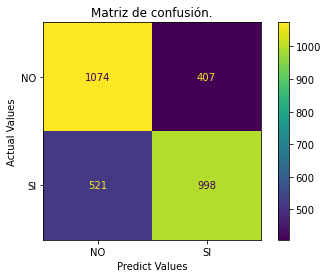

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.71     </td><td>0.66  </td><td>0.69    </td><td>0.68</td></tr>\n</tbody>\n</table>'

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Train Accuracy : 0.503


Test Accuracy : 0.494
Best Score Through Grid Search : 0.503
Best Parameters :  {'C': 0.001, 'coef0': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}


sigmoid

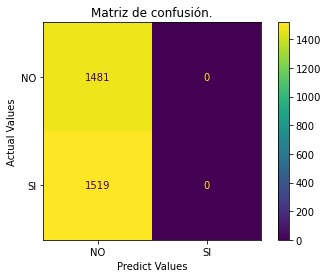

D:\Users\nico_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.00     </td><td>0.00  </td><td>0.49    </td><td>0.00</td></tr>\n</tbody>\n</table>'

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10 ]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10], 'coef0 ':[0,0.1,1]},
              {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 1]}     
]

parameters = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-5,1e-6],'C': [0.001,1,10,100]},
              {'kernel': ['sigmoid'], 'gamma': [1e-1,1e-2,1e-3],'C': [0.001, 0.10,0.1,1],'coef0' : [0.01,0.1,1,10]},
              #{'kernel': ['linear'], 'C': [1]}
              ]

for parameter in parameters:
    param_grid = parameter
    
    grid = GridSearchCV(SVC(), param_grid, n_jobs = -1, verbose = 3)
    grid.fit(X_train, y_train)
    kernel_str = parameter['kernel'][0]
    y_pred = grid.predict(X_test)
    dt = grid
    
    print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
    print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
    print('Best Score Through Grid Search : %.3f'%grid.best_score_)
    print('Best Parameters : ',grid.best_params_)

    svm_precision_score, svm_recall_score, svm_accuracy_score, svm_f1_score = evaluate_model(kernel_str, y_test, y_pred)


light_gbm default

light_gbm default

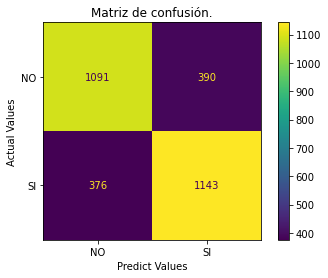

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.75     </td><td>0.75  </td><td>0.74    </td><td>0.75</td></tr>\n</tbody>\n</table>'

(0.7455968688845401,
 0.7524687294272547,
 0.7446666666666667,
 0.7490170380078637)

In [16]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

dt=lgb.LGBMClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
evaluate_model('light_gbm default',y_test, y_pred)

light_gbm con optimizacion bayesiana.

In [17]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict

application_train = X_train.join(y_train)
application_train, categorical_feats, encoder_dict = label_encoder(application_train)

X = application_train.drop('is_fishing', axis=1)
y = application_train.is_fishing


#dtrain = lgb.Dataset(data=X, label=y)

def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations=100):
    dtrain = lgb.Dataset(data=X, label=y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    def auc_score(preds,dtrain):
        labels = dtrain.get_label()
        return 'auc', roc_auc_score(labels, preds), True
        #f = roc_auc_score(y_test, y_score)

    # Objective Function
    #def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight,lambda_l1, lambda_l2, learning_rate):
    def hyp_lgbm(num_leaves, feature_fraction,   min_split_gain, lambda_l1, lambda_l2, learning_rate):

            params = {'application':'binary','num_iterations': num_iterations,'early_stopping_round':int(50 + 7/learning_rate),
                        'metric':'auc_score'} # Default parameters

            params["num_leaves"] = int(round(num_leaves))
            params['feature_fraction'] = max(min(feature_fraction, 1), 0)
            #params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
            #params['max_depth'] = int(round(max_depth))
            params['min_split_gain'] = min_split_gain
            #params['min_child_weight'] = min_child_weight
            
            params['learning_rate']= max(min(learning_rate, 1), 0)
            params['lambda_l1']= lambda_l1
            params['lambda_l2']= lambda_l2
            
            params['verbose']=-1
            params['objective'] ='binary'
            params['boost_from_average']=True #adjusts initial score to the mean of labels for faster convergence
            
            cv_results = lgb.cv(params, dtrain, nfold=3, seed=seed,categorical_feature=[], stratified=False, verbose_eval =None, feval=auc_score)
                            
            # print(cv_results)
            return np.max(cv_results['auc-mean'])
    # Domain space-- Range of hyperparameters 
    #https://lightgbm.readthedocs.io/en/latest/Parameters.html

    pds = {
                #'eta':(0.025,0.15),
                'num_leaves': (8, 1024),
                'feature_fraction': (0.1, 1.0),
                #'bagging_fraction': (0.1, 1),
                #'max_depth': (30, 70),
                'min_split_gain': (0.0, 20),
                #'min_child_weight': (10, 50),
                'lambda_l1':(0.0,10),
                'lambda_l2':(0.0,100),
                'learning_rate':(0.01, 0.2)          
                }



    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                        
    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)
    return optimizer.max['params']

parametros_optimos = bayesion_opt_lgbm(X, y, init_iter=1000, n_iters=20, random_state=50, seed = 40, num_iterations = 1000)
print(parametros_optimos)


|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary


|  1        |  0.7144   |  0.5451   |  2.281    |  25.55    |  0.0853   |  7.546    |  1.021e+0 |


|  2        |  0.7043   |  0.4674   |  7.719    |  76.05    |  0.0689   |  6.931    |  365.4    |


|  3        |  0.6925   |  0.2309   |  9.727    |  90.92    |  0.1164   |  6.272    |  910.4    |


|  4        |  0.6979   |  0.7071   |  3.911    |  50.72    |  0.1096   |  18.56    |  588.5    |


|  5        |  0.7386   |  0.7015   |  0.5226   |  32.71    |  0.02072  |  3.597    |  948.7    |


|  6        |  0.6978   |  0.9442   |  7.141    |  73.27    |  0.09773  |  18.63    |  420.9    |


|  7        |  0.6983   |  0.7149   |  6.499    |  59.88    |  0.05219  |  13.65    |  900.1    |


|  8        |  0.6981   |  0.817    |  4.32     |  91.79    |  0.1585   |  14.52    |  134.9    |


|  9        |  0.7089   |  0.9247   |  3.877    |  29.49    |  0.1272   |  9.357    |  267.4    |


|  10       |  0.7091   |  0.8551   |  1.786    |  22.71    |  0.1354   |  9.582    |  82.62    |


|  11       |  0.6907   |  0.2251   |  1.123    |  47.78    |  0.1127   |  19.16    |  601.1    |


|  12       |  0.6975   |  0.574    |  9.223    |  91.93    |  0.05788  |  13.65    |  987.7    |


|  13       |  0.6894   |  0.3043   |  7.16     |  79.78    |  0.188    |  17.07    |  436.3    |


|  14       |  0.6983   |  0.1049   |  0.3487   |  1.391    |  0.1219   |  7.66     |  124.7    |


|  15       |  0.706    |  0.878    |  8.217    |  73.75    |  0.1697   |  8.031    |  768.6    |


|  16       |  0.706    |  0.6037   |  6.132    |  29.81    |  0.1245   |  8.514    |  555.2    |


|  17       |  0.7332   |  0.5381   |  4.999    |  91.75    |  0.05995  |  0.994    |  478.1    |


|  18       |  0.6974   |  0.4674   |  4.87     |  7.052    |  0.1206   |  19.74    |  220.4    |


|  19       |  0.6924   |  0.2911   |  9.611    |  70.7     |  0.1227   |  7.617    |  657.0    |


|  20       |  0.7297   |  0.5522   |  0.8979   |  29.72    |  0.1673   |  3.509    |  927.0    |


|  21       |  0.7512   |  0.6295   |  0.1653   |  37.0     |  0.018    |  2.546    |  190.1    |


|  22       |  0.692    |  0.2498   |  8.837    |  90.6     |  0.05473  |  8.145    |  486.7    |


|  23       |  0.7015   |  0.8472   |  2.92     |  17.38    |  0.09705  |  18.05    |  612.5    |


|  24       |  0.7096   |  0.4714   |  4.057    |  30.85    |  0.0704   |  8.302    |  656.4    |


|  25       |  0.7161   |  0.8157   |  0.3703   |  73.45    |  0.1568   |  4.888    |  1.009e+0 |


|  26       |  0.7028   |  0.7075   |  8.928    |  24.31    |  0.01982  |  14.19    |  980.6    |


|  27       |  0.6935   |  0.1206   |  9.131    |  72.83    |  0.1915   |  5.463    |  181.3    |


|  28       |  0.7006   |  0.3903   |  2.772    |  49.06    |  0.03484  |  14.76    |  150.6    |


|  29       |  0.7073   |  0.6136   |  5.333    |  23.35    |  0.1006   |  9.295    |  826.9    |


|  30       |  0.6924   |  0.1167   |  7.128    |  25.1     |  0.1355   |  12.73    |  65.9     |


|  31       |  0.722    |  0.747    |  3.399    |  54.96    |  0.1514   |  3.57     |  262.7    |


|  32       |  0.6967   |  0.2205   |  1.508    |  93.9     |  0.1946   |  2.851    |  207.0    |


|  33       |  0.6931   |  0.1904   |  0.8181   |  76.84    |  0.04997  |  9.244    |  93.35    |


|  34       |  0.7002   |  0.3984   |  9.883    |  90.03    |  0.1744   |  7.685    |  719.8    |


|  35       |  0.6947   |  0.1334   |  5.013    |  11.39    |  0.1494   |  8.736    |  340.2    |


|  36       |  0.7975   |  0.7764   |  2.631    |  48.51    |  0.01125  |  0.1054   |  584.7    |


|  37       |  0.7238   |  0.4177   |  3.751    |  36.51    |  0.06872  |  3.418    |  1.003e+0 |


|  38       |  0.7005   |  0.7976   |  9.722    |  52.55    |  0.05531  |  9.703    |  606.7    |


|  39       |  0.7019   |  0.5504   |  4.297    |  25.08    |  0.02091  |  12.87    |  263.5    |


|  40       |  0.702    |  0.2724   |  5.107    |  38.07    |  0.1842   |  1.045    |  391.6    |


|  41       |  0.7      |  0.5479   |  5.793    |  80.75    |  0.1796   |  9.443    |  108.3    |


|  42       |  0.7188   |  0.7547   |  4.89     |  70.25    |  0.0779   |  3.875    |  350.9    |


|  43       |  0.6916   |  0.5919   |  9.589    |  91.6     |  0.1443   |  17.31    |  239.8    |


|  44       |  0.7098   |  0.8215   |  7.391    |  19.47    |  0.038    |  7.346    |  364.0    |


|  45       |  0.6956   |  0.1997   |  1.7      |  65.79    |  0.1898   |  5.109    |  119.2    |


|  46       |  0.7047   |  0.8066   |  4.888    |  61.2     |  0.1807   |  7.823    |  117.9    |


|  47       |  0.6994   |  0.385    |  0.2025   |  59.32    |  0.1211   |  13.82    |  688.9    |


|  48       |  0.6926   |  0.3117   |  5.857    |  19.71    |  0.1344   |  12.97    |  212.2    |


|  49       |  0.6916   |  0.1211   |  7.794    |  1.317    |  0.1314   |  15.1     |  660.7    |


|  50       |  0.726    |  0.8665   |  6.318    |  30.34    |  0.08859  |  3.36     |  828.7    |


|  51       |  0.6942   |  0.4923   |  3.956    |  56.68    |  0.1576   |  18.89    |  341.1    |


|  52       |  0.6935   |  0.3082   |  7.079    |  85.3     |  0.01456  |  4.969    |  407.4    |


|  53       |  0.6978   |  0.3028   |  4.548    |  83.25    |  0.1266   |  2.037    |  425.6    |


|  54       |  0.7021   |  0.9161   |  2.592    |  13.95    |  0.05555  |  18.1     |  349.5    |


|  55       |  0.6923   |  0.2453   |  2.995    |  56.74    |  0.09249  |  12.26    |  562.5    |


|  56       |  0.6962   |  0.7333   |  8.162    |  86.56    |  0.06061  |  17.08    |  282.1    |


|  57       |  0.6938   |  0.3418   |  9.141    |  46.49    |  0.125    |  6.481    |  876.1    |


|  58       |  0.6997   |  0.9841   |  7.924    |  34.74    |  0.04701  |  16.12    |  232.1    |


|  59       |  0.7166   |  0.7595   |  7.914    |  5.462    |  0.05542  |  5.876    |  167.2    |


|  60       |  0.7115   |  0.6099   |  3.588    |  32.16    |  0.1749   |  6.125    |  521.8    |


|  61       |  0.695    |  0.1587   |  0.5055   |  59.35    |  0.05054  |  6.633    |  217.5    |


|  62       |  0.6962   |  0.3792   |  9.488    |  84.27    |  0.1421   |  11.77    |  861.8    |


|  63       |  0.6985   |  0.5661   |  8.692    |  72.04    |  0.04443  |  14.73    |  669.9    |


|  64       |  0.7077   |  0.5011   |  3.494    |  67.2     |  0.0581   |  6.952    |  403.8    |


|  65       |  0.7049   |  0.7335   |  5.161    |  92.55    |  0.1852   |  7.014    |  603.5    |


|  66       |  0.7022   |  0.9534   |  5.875    |  81.57    |  0.03601  |  10.55    |  732.3    |


|  67       |  0.7314   |  0.7322   |  1.879    |  6.648    |  0.1793   |  5.256    |  950.7    |


|  68       |  0.7282   |  0.4027   |  2.566    |  41.26    |  0.1561   |  2.707    |  601.5    |


|  69       |  0.7302   |  0.8816   |  2.531    |  6.59     |  0.09367  |  6.275    |  441.1    |


|  70       |  0.6935   |  0.3203   |  0.9552   |  24.15    |  0.07439  |  11.2     |  765.8    |


|  71       |  0.6987   |  0.9584   |  7.558    |  43.37    |  0.02124  |  18.49    |  420.3    |


|  72       |  0.6911   |  0.1958   |  5.994    |  28.88    |  0.02529  |  16.56    |  573.0    |


|  73       |  0.6959   |  0.2209   |  2.27     |  67.81    |  0.159    |  4.332    |  403.4    |


|  74       |  0.7014   |  0.6691   |  0.6295   |  43.59    |  0.1384   |  14.3     |  168.0    |


|  75       |  0.693    |  0.1916   |  6.834    |  57.99    |  0.01788  |  7.647    |  625.5    |


|  76       |  0.713    |  0.6836   |  0.3236   |  27.06    |  0.02045  |  9.076    |  916.2    |


|  77       |  0.7301   |  0.5543   |  8.582    |  39.5     |  0.1299   |  1.531    |  347.6    |


|  78       |  0.6922   |  0.1361   |  6.001    |  57.46    |  0.1794   |  9.646    |  98.65    |


|  79       |  0.7012   |  0.9277   |  2.249    |  71.83    |  0.1652   |  13.93    |  914.4    |


|  80       |  0.6914   |  0.3009   |  2.147    |  30.49    |  0.06102  |  17.22    |  403.0    |


|  81       |  0.7108   |  0.4542   |  3.679    |  95.62    |  0.02364  |  4.718    |  31.05    |


|  82       |  0.7076   |  0.8893   |  5.548    |  16.17    |  0.09143  |  10.26    |  444.8    |


|  83       |  0.6904   |  0.1021   |  9.703    |  98.14    |  0.09591  |  11.88    |  36.52    |


|  84       |  0.7088   |  0.6682   |  8.493    |  85.01    |  0.1917   |  4.948    |  923.5    |


|  85       |  0.7015   |  0.885    |  6.299    |  29.8     |  0.09637  |  13.79    |  967.9    |


|  86       |  0.7146   |  0.9844   |  2.403    |  63.34    |  0.0713   |  6.874    |  504.4    |


|  87       |  0.7153   |  0.8064   |  0.3579   |  41.84    |  0.04587  |  7.112    |  921.1    |


|  88       |  0.7229   |  0.9689   |  4.35     |  80.16    |  0.1559   |  3.663    |  31.11    |


|  89       |  0.7116   |  0.6657   |  3.688    |  1.606    |  0.1414   |  11.65    |  234.7    |


|  90       |  0.7121   |  0.8201   |  1.163    |  47.67    |  0.08849  |  6.777    |  446.3    |


|  91       |  0.7123   |  0.9974   |  9.028    |  25.65    |  0.191    |  6.626    |  41.25    |


|  92       |  0.705    |  0.4996   |  0.9444   |  98.55    |  0.04516  |  7.297    |  494.4    |


|  93       |  0.7067   |  0.5771   |  2.002    |  81.43    |  0.06495  |  7.14     |  880.5    |


|  94       |  0.7028   |  0.2187   |  1.949    |  15.7     |  0.1302   |  2.152    |  403.7    |


|  95       |  0.7014   |  0.737    |  8.739    |  39.18    |  0.0806   |  10.57    |  44.78    |


|  96       |  0.6991   |  0.9029   |  7.49     |  89.74    |  0.1804   |  14.44    |  215.7    |


|  97       |  0.71     |  0.7098   |  9.4      |  92.25    |  0.0688   |  4.042    |  327.2    |


|  98       |  0.6925   |  0.3261   |  5.786    |  0.1844   |  0.04962  |  14.5     |  729.6    |


|  99       |  0.7356   |  0.5993   |  7.085    |  46.86    |  0.1968   |  0.9744   |  632.1    |


|  100      |  0.7148   |  0.7076   |  6.069    |  75.83    |  0.03233  |  4.415    |  414.4    |


|  101      |  0.6914   |  0.1148   |  2.724    |  30.59    |  0.08259  |  16.4     |  953.3    |


|  102      |  0.6999   |  0.2867   |  7.298    |  98.15    |  0.1045   |  0.751    |  564.1    |


|  103      |  0.6902   |  0.1284   |  9.373    |  35.66    |  0.01103  |  16.19    |  183.9    |


|  104      |  0.6986   |  0.6907   |  7.808    |  21.37    |  0.06386  |  18.11    |  856.3    |


|  105      |  0.6965   |  0.3697   |  6.59     |  85.48    |  0.0226   |  1.968    |  267.5    |


|  106      |  0.7397   |  0.7669   |  7.993    |  65.63    |  0.01039  |  1.197    |  862.1    |


|  107      |  0.7062   |  0.5941   |  3.505    |  69.27    |  0.1398   |  6.803    |  669.9    |


|  108      |  0.7394   |  0.5475   |  9.326    |  77.46    |  0.0247   |  0.3881   |  675.9    |


|  109      |  0.6988   |  0.5347   |  5.417    |  98.25    |  0.1093   |  10.78    |  970.2    |


|  110      |  0.6911   |  0.2379   |  2.802    |  62.49    |  0.06775  |  16.71    |  305.4    |


|  111      |  0.7231   |  0.8678   |  6.201    |  87.17    |  0.171    |  2.251    |  805.2    |


|  112      |  0.6889   |  0.1178   |  5.869    |  73.25    |  0.1492   |  19.35    |  606.4    |


|  113      |  0.7032   |  0.5731   |  4.017    |  49.54    |  0.1816   |  8.819    |  524.4    |


|  114      |  0.6909   |  0.3339   |  1.739    |  29.31    |  0.1754   |  19.04    |  295.6    |


|  115      |  0.6991   |  0.4867   |  8.795    |  51.53    |  0.1276   |  11.43    |  743.3    |


|  116      |  0.699    |  0.6985   |  4.111    |  76.82    |  0.123    |  14.17    |  1.012e+0 |


|  117      |  0.6997   |  0.1043   |  3.297    |  43.89    |  0.1018   |  2.172    |  503.2    |


|  118      |  0.7095   |  0.8068   |  6.013    |  49.66    |  0.1249   |  6.45     |  492.0    |


|  119      |  0.6951   |  0.3482   |  1.094    |  33.69    |  0.1674   |  7.289    |  546.9    |


|  120      |  0.7109   |  0.9668   |  5.14     |  9.342    |  0.1898   |  10.28    |  256.9    |


|  121      |  0.6964   |  0.2571   |  0.213    |  22.75    |  0.1318   |  6.888    |  1.013e+0 |


|  122      |  0.7011   |  0.476    |  8.088    |  2.913    |  0.08708  |  15.04    |  141.2    |


|  123      |  0.7258   |  0.4789   |  3.157    |  22.16    |  0.1778   |  3.782    |  1.024e+0 |


|  124      |  0.6929   |  0.1291   |  6.841    |  11.73    |  0.1142   |  11.64    |  257.6    |


|  125      |  0.6971   |  0.2477   |  6.209    |  91.77    |  0.07285  |  1.759    |  748.9    |


|  126      |  0.6907   |  0.2636   |  3.74     |  85.11    |  0.1557   |  12.37    |  642.3    |


|  127      |  0.6924   |  0.1746   |  7.405    |  47.07    |  0.07213  |  9.309    |  43.89    |


|  128      |  0.6952   |  0.2035   |  5.406    |  36.97    |  0.1415   |  4.825    |  414.7    |


|  129      |  0.7167   |  0.6969   |  6.561    |  16.93    |  0.1912   |  5.187    |  663.2    |


|  130      |  0.6955   |  0.5956   |  9.094    |  86.17    |  0.1203   |  13.96    |  223.8    |


|  131      |  0.6923   |  0.2648   |  9.238    |  64.43    |  0.1741   |  8.508    |  440.4    |


|  132      |  0.7002   |  0.1062   |  4.943    |  34.07    |  0.1384   |  1.77     |  366.3    |


|  133      |  0.6963   |  0.3436   |  1.254    |  97.79    |  0.05655  |  3.283    |  232.4    |


|  134      |  0.6933   |  0.3022   |  1.022    |  25.78    |  0.06632  |  11.74    |  711.9    |


|  135      |  0.6928   |  0.1522   |  7.636    |  49.09    |  0.1666   |  8.132    |  305.9    |


|  136      |  0.6948   |  0.1864   |  5.975    |  20.93    |  0.1224   |  5.777    |  176.7    |


|  137      |  0.7027   |  0.9069   |  6.729    |  75.76    |  0.07627  |  10.04    |  491.2    |


|  138      |  0.7109   |  0.8307   |  5.183    |  14.28    |  0.05884  |  8.351    |  164.6    |


|  139      |  0.7015   |  0.8731   |  1.698    |  55.49    |  0.1731   |  10.81    |  153.2    |


|  140      |  0.7008   |  0.7825   |  2.106    |  21.36    |  0.02347  |  18.82    |  767.3    |


|  141      |  0.6897   |  0.2703   |  9.531    |  48.23    |  0.133    |  18.8     |  68.66    |


|  142      |  0.7388   |  0.8164   |  9.423    |  31.28    |  0.1974   |  1.349    |  107.1    |


|  143      |  0.6906   |  0.1768   |  8.652    |  20.0     |  0.1094   |  18.92    |  117.2    |


|  144      |  0.7066   |  0.8556   |  7.145    |  93.46    |  0.03123  |  6.169    |  817.5    |


|  145      |  0.7318   |  0.6347   |  1.719    |  66.16    |  0.0141   |  2.953    |  789.6    |


|  146      |  0.6922   |  0.4688   |  6.396    |  82.63    |  0.1148   |  18.91    |  642.6    |


|  147      |  0.7055   |  0.8772   |  7.126    |  36.26    |  0.1941   |  9.744    |  655.7    |


|  148      |  0.6912   |  0.2962   |  4.148    |  66.17    |  0.06212  |  13.08    |  288.7    |


|  149      |  0.753    |  0.6344   |  6.881    |  57.47    |  0.1472   |  0.7059   |  514.9    |


|  150      |  0.7297   |  0.8833   |  5.947    |  92.53    |  0.03464  |  2.158    |  464.9    |


|  151      |  0.6912   |  0.1924   |  6.145    |  18.03    |  0.1971   |  13.16    |  675.8    |


|  152      |  0.7023   |  0.5238   |  5.345    |  53.64    |  0.1749   |  9.837    |  701.3    |


|  153      |  0.6889   |  0.2067   |  6.679    |  90.17    |  0.1865   |  17.47    |  929.0    |


|  154      |  0.6975   |  0.625    |  8.21     |  76.23    |  0.1675   |  13.52    |  378.4    |


|  155      |  0.7326   |  0.6468   |  2.482    |  3.624    |  0.01318  |  5.717    |  148.5    |


|  156      |  0.6925   |  0.2214   |  0.3631   |  13.4     |  0.06421  |  16.42    |  89.51    |


|  157      |  0.6904   |  0.136    |  2.97     |  69.09    |  0.09204  |  18.05    |  292.9    |


|  158      |  0.7014   |  0.6939   |  5.018    |  75.34    |  0.1252   |  11.5     |  677.0    |


|  159      |  0.703    |  0.823    |  7.77     |  18.84    |  0.0815   |  11.2     |  19.71    |


|  160      |  0.6951   |  0.5148   |  3.088    |  92.29    |  0.02106  |  18.53    |  56.3     |


|  161      |  0.6925   |  0.1622   |  0.06158  |  79.66    |  0.01299  |  11.17    |  55.48    |


|  162      |  0.691    |  0.1137   |  1.273    |  55.14    |  0.1891   |  16.69    |  89.93    |


|  163      |  0.7179   |  0.7391   |  1.942    |  36.67    |  0.04786  |  5.964    |  325.0    |


|  164      |  0.7027   |  0.3788   |  1.342    |  11.57    |  0.1837   |  13.91    |  858.7    |


|  165      |  0.6996   |  0.8385   |  0.1523   |  60.88    |  0.04732  |  15.7     |  560.9    |


|  166      |  0.6939   |  0.4101   |  2.553    |  86.83    |  0.1753   |  17.2     |  928.7    |


|  167      |  0.6934   |  0.5706   |  5.903    |  97.11    |  0.08505  |  17.61    |  670.6    |


|  168      |  0.6931   |  0.3501   |  3.197    |  3.092    |  0.1686   |  13.22    |  184.5    |


|  169      |  0.7511   |  0.6231   |  1.898    |  68.81    |  0.167    |  0.6621   |  954.2    |


|  170      |  0.705    |  0.6852   |  4.063    |  62.92    |  0.1756   |  7.794    |  988.1    |


|  171      |  0.7013   |  0.8817   |  4.783    |  52.28    |  0.04066  |  12.77    |  492.9    |


|  172      |  0.6977   |  0.7968   |  2.144    |  87.17    |  0.1911   |  17.86    |  414.0    |


|  173      |  0.7007   |  0.7079   |  4.176    |  35.75    |  0.04974  |  14.41    |  30.11    |


|  174      |  0.6989   |  0.8515   |  5.585    |  74.8     |  0.08157  |  12.67    |  804.4    |


|  175      |  0.7152   |  0.6446   |  4.119    |  5.968    |  0.1602   |  7.83     |  374.0    |


|  176      |  0.7004   |  0.6704   |  4.715    |  29.44    |  0.05091  |  14.63    |  684.0    |


|  177      |  0.7026   |  0.6001   |  0.8109   |  71.03    |  0.1995   |  9.076    |  498.2    |


|  178      |  0.7027   |  0.7104   |  0.08021  |  87.92    |  0.07018  |  10.38    |  560.7    |


|  179      |  0.7142   |  0.6772   |  3.734    |  35.4     |  0.1396   |  6.244    |  106.2    |


|  180      |  0.7501   |  0.7008   |  0.8288   |  82.51    |  0.1746   |  1.355    |  658.3    |


|  181      |  0.702    |  0.9658   |  1.245    |  40.34    |  0.1051   |  15.02    |  338.1    |


|  182      |  0.7615   |  0.9557   |  9.884    |  10.21    |  0.1722   |  0.548    |  262.3    |


|  183      |  0.7164   |  0.5872   |  5.368    |  88.92    |  0.03324  |  3.004    |  465.0    |


|  184      |  0.7128   |  0.5594   |  3.02     |  40.34    |  0.1448   |  6.457    |  841.4    |


|  185      |  0.6905   |  0.3131   |  6.933    |  45.7     |  0.128    |  15.62    |  42.79    |


|  186      |  0.709    |  0.7468   |  5.453    |  30.3     |  0.1703   |  7.697    |  58.6     |


|  187      |  0.7016   |  0.4568   |  9.213    |  20.37    |  0.01055  |  11.92    |  381.7    |


|  188      |  0.7187   |  0.5426   |  0.09242  |  48.33    |  0.1552   |  5.137    |  481.5    |


|  189      |  0.6922   |  0.3734   |  4.199    |  2.367    |  0.1015   |  16.79    |  415.9    |


|  190      |  0.694    |  0.1765   |  3.083    |  95.12    |  0.09055  |  5.941    |  304.6    |


|  191      |  0.7004   |  0.8963   |  6.565    |  74.31    |  0.07994  |  12.55    |  449.4    |


|  192      |  0.7052   |  0.8073   |  9.808    |  82.22    |  0.04004  |  6.209    |  1.012e+0 |


|  193      |  0.6974   |  0.9644   |  9.676    |  88.9     |  0.1639   |  18.34    |  663.5    |


|  194      |  0.6996   |  0.8062   |  6.965    |  45.23    |  0.05185  |  13.97    |  165.2    |


|  195      |  0.7267   |  0.6009   |  7.08     |  25.25    |  0.1451   |  2.43     |  195.5    |


|  196      |  0.7014   |  0.6197   |  3.396    |  32.32    |  0.04957  |  15.79    |  871.9    |


|  197      |  0.7205   |  0.9563   |  3.057    |  12.36    |  0.08975  |  7.897    |  416.5    |


|  198      |  0.691    |  0.337    |  0.3844   |  59.76    |  0.03611  |  18.53    |  954.3    |


|  199      |  0.7237   |  0.8771   |  2.279    |  94.2     |  0.1087   |  3.752    |  82.25    |


|  200      |  0.6931   |  0.1682   |  2.332    |  32.54    |  0.1347   |  11.23    |  1.014e+0 |


|  201      |  0.6908   |  0.166    |  1.925    |  63.39    |  0.1452   |  18.44    |  790.8    |


|  202      |  0.7032   |  0.8124   |  4.955    |  8.929    |  0.08631  |  15.0     |  587.1    |


|  203      |  0.6981   |  0.6893   |  5.053    |  49.82    |  0.1622   |  18.81    |  806.9    |


|  204      |  0.6939   |  0.2986   |  4.516    |  43.08    |  0.06491  |  7.184    |  771.7    |


|  205      |  0.7506   |  0.8      |  8.926    |  28.71    |  0.01532  |  0.7873   |  101.1    |


|  206      |  0.7693   |  0.9605   |  0.2196   |  30.55    |  0.1611   |  1.642    |  764.9    |


|  207      |  0.6991   |  0.3767   |  8.608    |  77.37    |  0.1445   |  9.771    |  745.5    |


|  208      |  0.7031   |  0.9591   |  9.193    |  16.24    |  0.1091   |  12.47    |  277.4    |


|  209      |  0.6971   |  0.8055   |  5.948    |  97.86    |  0.1893   |  18.88    |  275.0    |


|  210      |  0.7048   |  0.3879   |  8.389    |  89.89    |  0.01866  |  5.747    |  627.8    |


|  211      |  0.6919   |  0.2933   |  5.321    |  12.03    |  0.1983   |  12.54    |  623.8    |


|  212      |  0.7223   |  0.4738   |  4.426    |  21.5     |  0.1191   |  4.194    |  807.1    |


|  213      |  0.6952   |  0.5598   |  5.07     |  96.54    |  0.06119  |  18.7     |  358.0    |


|  214      |  0.6996   |  0.5331   |  3.607    |  65.64    |  0.07876  |  12.61    |  601.3    |


|  215      |  0.7057   |  0.6719   |  7.238    |  75.23    |  0.03169  |  6.874    |  376.9    |


|  216      |  0.6942   |  0.2567   |  2.707    |  75.5     |  0.1883   |  6.461    |  500.0    |


|  217      |  0.7074   |  0.6066   |  4.47     |  65.41    |  0.07235  |  7.428    |  516.9    |


|  218      |  0.7128   |  0.5876   |  1.884    |  99.93    |  0.187    |  4.455    |  479.2    |


|  219      |  0.696    |  0.2609   |  5.879    |  86.03    |  0.07028  |  2.471    |  31.13    |


|  220      |  0.722    |  0.6405   |  4.361    |  22.92    |  0.1661   |  4.41     |  859.0    |


|  221      |  0.69     |  0.1675   |  3.772    |  45.57    |  0.1726   |  18.34    |  572.0    |


|  222      |  0.6922   |  0.2174   |  8.881    |  80.14    |  0.0446   |  8.407    |  189.4    |


|  223      |  0.6942   |  0.366    |  4.815    |  86.5     |  0.1555   |  5.036    |  995.7    |


|  224      |  0.7008   |  0.9265   |  4.576    |  20.18    |  0.04151  |  18.17    |  347.6    |


|  225      |  0.708    |  0.9805   |  1.676    |  22.89    |  0.05875  |  11.92    |  945.4    |


|  226      |  0.7025   |  0.9253   |  8.239    |  68.24    |  0.1474   |  9.929    |  435.0    |


|  227      |  0.6951   |  0.1512   |  1.841    |  47.08    |  0.1777   |  6.745    |  1.023e+0 |


|  228      |  0.7012   |  0.8184   |  6.606    |  9.428    |  0.07102  |  18.39    |  934.7    |


|  229      |  0.7212   |  0.5362   |  6.429    |  44.78    |  0.1358   |  2.898    |  116.0    |


|  230      |  0.7376   |  0.5171   |  1.904    |  74.06    |  0.11     |  1.299    |  502.2    |


|  231      |  0.6913   |  0.2259   |  4.852    |  46.32    |  0.1453   |  17.5     |  953.1    |


|  232      |  0.7288   |  0.7905   |  0.7979   |  23.76    |  0.1185   |  5.167    |  923.2    |


|  233      |  0.6952   |  0.5353   |  8.798    |  93.34    |  0.1693   |  12.45    |  988.7    |


|  234      |  0.6975   |  0.8696   |  2.837    |  69.21    |  0.1247   |  17.54    |  1.015e+0 |


|  235      |  0.7285   |  0.7904   |  3.09     |  86.42    |  0.02207  |  2.613    |  411.9    |


|  236      |  0.7626   |  0.4559   |  7.436    |  27.66    |  0.06778  |  0.1013   |  906.2    |


|  237      |  0.7466   |  0.7854   |  3.416    |  79.78    |  0.1073   |  1.313    |  821.8    |


|  238      |  0.6971   |  0.4544   |  1.959    |  67.06    |  0.1673   |  13.56    |  985.8    |


|  239      |  0.6913   |  0.1172   |  0.9111   |  26.0     |  0.02     |  18.95    |  532.1    |


|  240      |  0.7572   |  0.5742   |  5.225    |  86.44    |  0.03152  |  0.1621   |  356.3    |


|  241      |  0.6899   |  0.3374   |  9.874    |  62.24    |  0.1926   |  15.5     |  746.8    |


|  242      |  0.7453   |  0.6311   |  5.831    |  3.087    |  0.1625   |  2.61     |  488.4    |


|  243      |  0.7024   |  0.672    |  9.168    |  29.3     |  0.07595  |  9.481    |  670.0    |


|  244      |  0.7161   |  0.4817   |  7.63     |  3.2      |  0.01185  |  5.369    |  767.1    |


|  245      |  0.7714   |  0.6964   |  2.77     |  13.57    |  0.1158   |  1.172    |  153.8    |


|  246      |  0.7058   |  0.7951   |  2.692    |  35.52    |  0.04548  |  9.882    |  1.013e+0 |


|  247      |  0.6952   |  0.2749   |  6.008    |  64.42    |  0.04797  |  4.104    |  1.012e+0 |


|  248      |  0.7058   |  0.7402   |  6.066    |  93.72    |  0.158    |  6.696    |  67.16    |


|  249      |  0.6982   |  0.4993   |  4.93     |  12.38    |  0.09083  |  19.86    |  259.3    |


|  250      |  0.6966   |  0.8448   |  9.121    |  90.85    |  0.1527   |  18.84    |  712.6    |


|  251      |  0.6936   |  0.1432   |  8.119    |  92.13    |  0.117    |  4.952    |  170.3    |


|  252      |  0.7031   |  0.8675   |  1.601    |  96.09    |  0.1847   |  8.292    |  640.9    |


|  253      |  0.6927   |  0.1285   |  9.225    |  73.68    |  0.07916  |  6.638    |  325.4    |


|  254      |  0.6907   |  0.3083   |  9.215    |  62.98    |  0.1784   |  13.72    |  807.9    |


|  255      |  0.692    |  0.3708   |  6.402    |  13.02    |  0.183    |  13.03    |  609.0    |


|  256      |  0.7154   |  0.6999   |  9.094    |  9.405    |  0.1576   |  5.433    |  504.1    |


|  257      |  0.6955   |  0.5361   |  8.226    |  30.27    |  0.1449   |  15.22    |  925.5    |


|  258      |  0.6948   |  0.1318   |  9.418    |  98.6     |  0.1498   |  2.969    |  123.3    |


|  259      |  0.694    |  0.3099   |  1.028    |  38.26    |  0.08466  |  9.05     |  847.2    |


|  260      |  0.6991   |  0.8213   |  9.522    |  97.59    |  0.05286  |  9.744    |  904.3    |


|  261      |  0.7029   |  0.918    |  9.867    |  15.86    |  0.03345  |  12.2     |  534.7    |


|  262      |  0.698    |  0.8921   |  8.69     |  90.95    |  0.1249   |  16.36    |  816.4    |


|  263      |  0.7012   |  0.7737   |  0.02313  |  22.03    |  0.0632   |  19.3     |  501.4    |


|  264      |  0.6978   |  0.675    |  0.2974   |  90.01    |  0.08438  |  17.38    |  915.2    |


|  265      |  0.7008   |  0.1113   |  0.8722   |  33.63    |  0.03127  |  2.577    |  828.9    |


|  266      |  0.697    |  0.4305   |  0.1012   |  88.15    |  0.1231   |  15.51    |  106.4    |


|  267      |  0.6901   |  0.2085   |  7.624    |  38.82    |  0.07308  |  19.09    |  1.014e+0 |


|  268      |  0.7029   |  0.5824   |  3.51     |  89.98    |  0.132    |  8.526    |  997.1    |


|  269      |  0.6979   |  0.4727   |  7.359    |  41.33    |  0.09939  |  14.2     |  1.016e+0 |


|  270      |  0.6952   |  0.251    |  3.283    |  20.91    |  0.01861  |  6.27     |  573.7    |


|  271      |  0.7044   |  0.6154   |  9.389    |  5.378    |  0.1323   |  9.301    |  726.2    |


|  272      |  0.7567   |  0.7419   |  5.055    |  30.23    |  0.02723  |  1.135    |  127.0    |


|  273      |  0.7161   |  0.9882   |  1.543    |  63.23    |  0.1415   |  6.499    |  512.4    |


|  274      |  0.7197   |  0.7673   |  7.455    |  58.45    |  0.04071  |  3.359    |  848.6    |


|  275      |  0.6937   |  0.2685   |  6.053    |  88.06    |  0.08241  |  5.246    |  630.9    |


|  276      |  0.7009   |  0.972    |  7.094    |  61.31    |  0.06846  |  11.52    |  619.3    |


|  277      |  0.6896   |  0.3244   |  4.56     |  93.71    |  0.1932   |  17.07    |  359.2    |


|  278      |  0.7018   |  0.3853   |  9.494    |  49.57    |  0.06151  |  10.07    |  482.5    |


|  279      |  0.7001   |  0.1053   |  1.152    |  94.49    |  0.08933  |  1.845    |  937.7    |


|  280      |  0.705    |  0.7959   |  6.675    |  21.45    |  0.08624  |  10.09    |  636.6    |


|  281      |  0.7011   |  0.8126   |  4.904    |  57.01    |  0.1808   |  10.86    |  109.3    |


|  282      |  0.758    |  0.6761   |  1.676    |  0.9179   |  0.07325  |  3.915    |  306.9    |


|  283      |  0.6929   |  0.2998   |  6.459    |  23.77    |  0.1007   |  10.91    |  641.3    |


|  284      |  0.6917   |  0.2458   |  6.911    |  1.308    |  0.1004   |  16.38    |  436.4    |


|  285      |  0.7015   |  0.492    |  7.148    |  45.22    |  0.05397  |  11.74    |  571.4    |


|  286      |  0.7019   |  0.9279   |  1.212    |  61.8     |  0.198    |  12.94    |  973.7    |


|  287      |  0.7011   |  0.4722   |  3.392    |  33.24    |  0.03933  |  16.21    |  483.6    |


|  288      |  0.7077   |  0.8429   |  7.443    |  69.34    |  0.02373  |  6.38     |  1.011e+0 |


|  289      |  0.695    |  0.6211   |  9.782    |  71.85    |  0.03144  |  18.41    |  468.0    |


|  290      |  0.703    |  0.8056   |  9.583    |  76.69    |  0.1804   |  7.561    |  1.008e+0 |


|  291      |  0.7058   |  0.6018   |  7.571    |  4.515    |  0.1545   |  9.706    |  976.7    |


|  292      |  0.6987   |  0.9533   |  4.842    |  63.86    |  0.1676   |  17.63    |  603.7    |


|  293      |  0.7007   |  0.9345   |  0.3477   |  99.9     |  0.1272   |  14.91    |  737.2    |


|  294      |  0.6925   |  0.335    |  4.127    |  98.05    |  0.1422   |  7.701    |  979.1    |


|  295      |  0.7013   |  0.1251   |  1.903    |  26.15    |  0.03082  |  2.247    |  502.3    |


|  296      |  0.6934   |  0.3648   |  3.438    |  13.89    |  0.1206   |  11.79    |  175.2    |


|  297      |  0.6906   |  0.3442   |  9.092    |  81.02    |  0.125    |  12.91    |  390.0    |


|  298      |  0.6918   |  0.3257   |  1.848    |  48.3     |  0.1396   |  14.32    |  685.8    |


|  299      |  0.6961   |  0.3947   |  1.896    |  89.6     |  0.01758  |  19.01    |  590.6    |


|  300      |  0.7213   |  0.6357   |  6.275    |  74.12    |  0.0125   |  3.318    |  666.8    |


|  301      |  0.717    |  0.6003   |  7.073    |  85.37    |  0.08668  |  2.847    |  218.9    |


|  302      |  0.7071   |  0.6925   |  1.655    |  19.14    |  0.1264   |  11.93    |  621.3    |


|  303      |  0.7355   |  0.8088   |  4.155    |  19.92    |  0.1621   |  3.221    |  546.7    |


|  304      |  0.69     |  0.3178   |  8.326    |  45.41    |  0.08399  |  15.77    |  449.8    |


|  305      |  0.6958   |  0.5552   |  2.39     |  90.66    |  0.1018   |  16.3     |  15.1     |


|  306      |  0.7197   |  0.4807   |  3.757    |  70.17    |  0.1751   |  3.239    |  792.2    |


|  307      |  0.7239   |  0.836    |  5.955    |  22.16    |  0.1191   |  3.868    |  20.16    |


|  308      |  0.703    |  0.5827   |  6.759    |  26.78    |  0.07565  |  11.71    |  714.4    |


|  309      |  0.7131   |  0.5345   |  8.369    |  43.05    |  0.07632  |  4.187    |  613.0    |


|  310      |  0.6953   |  0.2536   |  3.289    |  97.56    |  0.03828  |  3.99     |  143.4    |


|  311      |  0.7161   |  0.7982   |  2.411    |  38.09    |  0.135    |  6.287    |  741.6    |


|  312      |  0.7064   |  0.7137   |  3.968    |  42.5     |  0.08396  |  8.411    |  756.0    |


|  313      |  0.699    |  0.6674   |  6.133    |  81.56    |  0.09929  |  14.73    |  600.1    |


|  314      |  0.6928   |  0.2415   |  6.376    |  65.32    |  0.1729   |  7.655    |  226.7    |


|  315      |  0.7074   |  0.5086   |  4.682    |  65.26    |  0.01251  |  6.31     |  525.4    |


|  316      |  0.7079   |  0.6934   |  4.148    |  60.09    |  0.09485  |  7.126    |  8.085    |


|  317      |  0.6912   |  0.3268   |  3.083    |  8.384    |  0.1177   |  18.81    |  75.18    |


|  318      |  0.69     |  0.258    |  6.807    |  77.71    |  0.03911  |  15.84    |  116.3    |


|  319      |  0.7136   |  0.8096   |  4.123    |  62.06    |  0.1101   |  5.397    |  379.9    |


|  320      |  0.7011   |  0.2934   |  1.67     |  64.65    |  0.1642   |  1.765    |  198.3    |


|  321      |  0.7013   |  0.3962   |  7.108    |  6.499    |  0.01903  |  14.76    |  304.6    |


|  322      |  0.6984   |  0.4373   |  3.627    |  10.35    |  0.1949   |  19.26    |  443.3    |


|  323      |  0.7402   |  0.857    |  0.4717   |  0.2609   |  0.1339   |  6.961    |  123.0    |


|  324      |  0.6981   |  0.3113   |  8.427    |  56.3     |  0.106    |  1.316    |  303.1    |


|  325      |  0.7039   |  0.4757   |  5.113    |  36.03    |  0.1875   |  9.873    |  72.87    |


|  326      |  0.7011   |  0.9379   |  5.098    |  63.02    |  0.1897   |  12.38    |  655.9    |


|  327      |  0.6897   |  0.3219   |  4.92     |  96.98    |  0.1159   |  16.52    |  944.8    |


|  328      |  0.7027   |  0.4181   |  3.486    |  55.64    |  0.1662   |  9.058    |  62.27    |


|  329      |  0.7112   |  0.4074   |  7.112    |  36.72    |  0.1364   |  5.327    |  364.6    |


|  330      |  0.7338   |  0.457    |  8.562    |  2.365    |  0.1391   |  1.614    |  841.9    |


|  331      |  0.7141   |  0.8267   |  9.103    |  79.01    |  0.0767   |  3.318    |  769.1    |


|  332      |  0.6911   |  0.2705   |  2.134    |  23.04    |  0.1536   |  19.56    |  872.4    |


|  333      |  0.6897   |  0.1831   |  8.632    |  45.91    |  0.1889   |  17.01    |  197.6    |


|  334      |  0.7237   |  0.7427   |  4.358    |  23.57    |  0.154    |  4.262    |  193.0    |


|  335      |  0.6956   |  0.6168   |  9.956    |  77.39    |  0.117    |  13.79    |  537.8    |


|  336      |  0.7055   |  0.4276   |  5.914    |  28.33    |  0.09555  |  10.03    |  700.9    |


|  337      |  0.7012   |  0.4363   |  0.4391   |  11.02    |  0.06574  |  18.24    |  926.0    |


|  338      |  0.7204   |  0.861    |  3.164    |  52.39    |  0.01956  |  4.728    |  683.8    |


|  339      |  0.7632   |  0.6167   |  0.7762   |  10.91    |  0.06301  |  1.046    |  638.0    |


|  340      |  0.6983   |  0.4399   |  2.304    |  51.89    |  0.1445   |  14.93    |  358.6    |


|  341      |  0.726    |  0.7108   |  7.605    |  88.4     |  0.1187   |  1.669    |  975.7    |


|  342      |  0.6955   |  0.3217   |  5.932    |  59.67    |  0.1857   |  3.794    |  357.1    |


|  343      |  0.7443   |  0.7897   |  6.558    |  11.77    |  0.0784   |  1.892    |  777.7    |


|  344      |  0.706    |  0.5161   |  7.511    |  51.51    |  0.02466  |  6.863    |  376.6    |


|  345      |  0.7192   |  0.5796   |  3.617    |  66.23    |  0.03139  |  3.437    |  623.8    |


|  346      |  0.7476   |  0.8491   |  0.05072  |  26.48    |  0.1849   |  3.153    |  658.8    |


|  347      |  0.6909   |  0.3082   |  0.8993   |  67.02    |  0.1311   |  19.01    |  801.1    |


|  348      |  0.7038   |  0.5608   |  2.659    |  31.03    |  0.01482  |  11.62    |  159.0    |


|  349      |  0.6953   |  0.2772   |  8.817    |  54.23    |  0.1586   |  3.155    |  268.8    |


|  350      |  0.7009   |  0.8845   |  0.0333   |  38.75    |  0.08478  |  17.03    |  114.7    |


|  351      |  0.6926   |  0.2609   |  0.1637   |  19.73    |  0.1822   |  14.69    |  435.4    |


|  352      |  0.7162   |  0.4401   |  7.483    |  21.73    |  0.1328   |  4.148    |  436.9    |


|  353      |  0.6991   |  0.9588   |  9.463    |  29.5     |  0.02132  |  16.97    |  983.3    |


|  354      |  0.6979   |  0.5426   |  1.474    |  70.85    |  0.07462  |  17.92    |  951.9    |


|  355      |  0.7024   |  0.4975   |  9.163    |  9.291    |  0.1198   |  11.94    |  222.0    |


|  356      |  0.7015   |  0.8232   |  8.815    |  57.28    |  0.06976  |  9.293    |  647.1    |


|  357      |  0.6967   |  0.8829   |  8.441    |  92.24    |  0.01108  |  19.66    |  933.5    |


|  358      |  0.7015   |  0.9349   |  7.447    |  34.18    |  0.0578   |  12.62    |  614.0    |


|  359      |  0.7126   |  0.6854   |  1.081    |  19.49    |  0.09048  |  9.478    |  437.9    |


|  360      |  0.7044   |  0.7724   |  2.143    |  83.77    |  0.06422  |  8.326    |  563.9    |


|  361      |  0.6913   |  0.337    |  7.6      |  76.35    |  0.1288   |  11.29    |  910.0    |


|  362      |  0.724    |  0.7755   |  9.926    |  61.83    |  0.06088  |  2.225    |  924.7    |


|  363      |  0.6992   |  0.8995   |  8.788    |  55.82    |  0.0442   |  16.03    |  548.6    |


|  364      |  0.6911   |  0.352    |  4.396    |  70.77    |  0.1385   |  13.15    |  627.6    |


|  365      |  0.7139   |  0.479    |  3.916    |  21.71    |  0.1873   |  5.763    |  687.8    |


|  366      |  0.6927   |  0.3441   |  3.34     |  8.637    |  0.1091   |  14.96    |  840.1    |


|  367      |  0.7083   |  0.7321   |  8.194    |  94.4     |  0.1776   |  4.555    |  469.8    |


|  368      |  0.6999   |  0.6737   |  3.044    |  96.4     |  0.02273  |  13.75    |  699.9    |


|  369      |  0.7357   |  0.9426   |  3.256    |  0.8968   |  0.195    |  6.193    |  977.5    |


|  370      |  0.6934   |  0.1405   |  7.956    |  78.03    |  0.13     |  6.028    |  784.1    |


|  371      |  0.6997   |  0.9482   |  3.352    |  28.95    |  0.03307  |  18.93    |  753.0    |


|  372      |  0.7081   |  0.9037   |  8.998    |  75.97    |  0.03173  |  6.474    |  916.6    |


|  373      |  0.7033   |  0.6058   |  9.794    |  46.03    |  0.1271   |  8.661    |  223.9    |


|  374      |  0.6903   |  0.1517   |  4.419    |  90.71    |  0.02262  |  14.74    |  332.4    |


|  375      |  0.7117   |  0.6316   |  1.182    |  77.18    |  0.1746   |  5.99     |  255.3    |


|  376      |  0.6927   |  0.2097   |  4.719    |  44.13    |  0.1527   |  9.826    |  378.0    |


|  377      |  0.7462   |  0.6626   |  3.767    |  27.18    |  0.1219   |  1.966    |  803.6    |


|  378      |  0.7      |  0.9996   |  7.306    |  62.07    |  0.1923   |  12.43    |  59.78    |


|  379      |  0.7009   |  0.9347   |  5.475    |  80.0     |  0.06998  |  13.2     |  384.3    |


|  380      |  0.6898   |  0.3278   |  5.034    |  84.22    |  0.1168   |  17.37    |  265.0    |


|  381      |  0.6978   |  0.2848   |  0.9706   |  96.0     |  0.1869   |  2.604    |  157.2    |


|  382      |  0.7004   |  0.3979   |  8.555    |  29.33    |  0.04883  |  14.82    |  100.1    |


|  383      |  0.7461   |  0.9207   |  9.974    |  45.97    |  0.1875   |  0.9942   |  49.88    |


|  384      |  0.757    |  0.6362   |  7.413    |  61.82    |  0.05779  |  0.5239   |  206.5    |


|  385      |  0.6996   |  0.6892   |  1.462    |  71.03    |  0.1083   |  14.7     |  973.1    |


|  386      |  0.6987   |  0.971    |  3.372    |  66.42    |  0.179    |  18.0     |  866.4    |


|  387      |  0.7507   |  0.4294   |  5.771    |  19.36    |  0.07587  |  0.6119   |  169.1    |


|  388      |  0.7017   |  0.8994   |  7.227    |  18.79    |  0.1956   |  12.81    |  605.0    |


|  389      |  0.6984   |  0.8497   |  8.586    |  58.13    |  0.1104   |  14.4     |  762.0    |


|  390      |  0.7012   |  0.6789   |  6.095    |  56.8     |  0.1147   |  12.79    |  354.1    |


|  391      |  0.7272   |  0.8584   |  1.823    |  38.21    |  0.03574  |  4.263    |  645.5    |


|  392      |  0.7069   |  0.6758   |  3.839    |  20.59    |  0.1012   |  9.797    |  283.8    |


|  393      |  0.7284   |  0.8134   |  9.666    |  71.43    |  0.1179   |  1.335    |  242.6    |


|  394      |  0.8081   |  0.9528   |  1.108    |  87.42    |  0.1617   |  0.1259   |  655.5    |


|  395      |  0.6973   |  0.6474   |  5.151    |  53.91    |  0.1535   |  17.76    |  779.3    |


|  396      |  0.6965   |  0.5124   |  4.53     |  86.22    |  0.01219  |  17.15    |  244.8    |


|  397      |  0.7069   |  0.4022   |  6.836    |  58.49    |  0.1191   |  6.193    |  688.3    |


|  398      |  0.6983   |  0.5023   |  4.03     |  76.13    |  0.07381  |  14.63    |  433.9    |


|  399      |  0.699    |  0.6809   |  9.408    |  49.27    |  0.07308  |  13.76    |  308.5    |


|  400      |  0.6988   |  0.8719   |  3.928    |  99.78    |  0.06326  |  12.94    |  906.0    |


|  401      |  0.7387   |  0.9347   |  5.479    |  39.16    |  0.03564  |  2.279    |  466.3    |


|  402      |  0.7004   |  0.7841   |  7.158    |  38.42    |  0.0526   |  13.37    |  945.4    |


|  403      |  0.6987   |  0.9525   |  9.484    |  73.78    |  0.07059  |  15.58    |  349.5    |


|  404      |  0.705    |  0.381    |  9.295    |  64.63    |  0.05762  |  6.562    |  887.5    |


|  405      |  0.7416   |  0.6097   |  6.456    |  83.4     |  0.1319   |  0.5029   |  228.2    |


|  406      |  0.6993   |  0.221    |  0.2821   |  60.05    |  0.1198   |  2.923    |  770.5    |


|  407      |  0.6906   |  0.1478   |  3.343    |  54.12    |  0.08106  |  17.45    |  547.5    |


|  408      |  0.7476   |  0.7647   |  0.2763   |  51.76    |  0.0725   |  2.307    |  552.1    |


|  409      |  0.6987   |  0.811    |  0.8824   |  56.52    |  0.165    |  15.76    |  592.6    |


|  410      |  0.7062   |  0.504    |  6.196    |  60.65    |  0.0891   |  7.923    |  97.16    |


|  411      |  0.6946   |  0.2842   |  1.575    |  32.91    |  0.1925   |  8.34     |  326.0    |


|  412      |  0.703    |  0.4435   |  7.207    |  8.606    |  0.04318  |  13.33    |  269.0    |


|  413      |  0.701    |  0.873    |  5.832    |  20.72    |  0.0187   |  19.17    |  197.1    |


|  414      |  0.6929   |  0.1685   |  2.642    |  60.64    |  0.07359  |  9.756    |  285.0    |


|  415      |  0.7036   |  0.6516   |  4.915    |  11.86    |  0.01572  |  16.02    |  872.1    |


|  416      |  0.7195   |  0.4305   |  1.844    |  39.26    |  0.02087  |  4.491    |  163.9    |


|  417      |  0.6936   |  0.3504   |  8.329    |  93.34    |  0.03244  |  4.627    |  798.6    |


|  418      |  0.6993   |  0.1461   |  1.267    |  26.79    |  0.1283   |  3.741    |  859.9    |


|  419      |  0.6914   |  0.3001   |  5.842    |  6.95     |  0.07644  |  16.41    |  768.9    |


|  420      |  0.6947   |  0.3073   |  9.213    |  75.02    |  0.1161   |  3.628    |  533.9    |


|  421      |  0.7009   |  0.6523   |  9.112    |  33.56    |  0.05624  |  11.47    |  309.9    |


|  422      |  0.7092   |  0.9433   |  2.188    |  19.86    |  0.1198   |  11.34    |  972.7    |


|  423      |  0.6909   |  0.3576   |  7.322    |  10.31    |  0.03301  |  18.2     |  371.9    |


|  424      |  0.6951   |  0.204    |  8.011    |  15.07    |  0.135    |  4.648    |  394.1    |


|  425      |  0.7153   |  0.8838   |  7.771    |  70.05    |  0.0616   |  4.763    |  822.0    |


|  426      |  0.776    |  0.9691   |  6.676    |  31.9     |  0.05668  |  0.2921   |  41.98    |


|  427      |  0.6986   |  0.83     |  9.096    |  90.62    |  0.07966  |  11.27    |  217.3    |


|  428      |  0.701    |  0.5408   |  9.227    |  0.8811   |  0.09029  |  14.41    |  426.1    |


|  429      |  0.697    |  0.7234   |  9.827    |  49.77    |  0.1361   |  18.78    |  869.4    |


|  430      |  0.6936   |  0.347    |  5.423    |  24.7     |  0.04213  |  8.781    |  989.0    |


|  431      |  0.7008   |  0.9113   |  3.239    |  71.26    |  0.06221  |  15.59    |  416.6    |


|  432      |  0.7182   |  0.9164   |  2.834    |  3.695    |  0.06361  |  10.41    |  879.0    |


|  433      |  0.7257   |  0.8352   |  7.7      |  99.64    |  0.1629   |  1.618    |  39.53    |


|  434      |  0.6994   |  0.6315   |  3.273    |  87.75    |  0.01458  |  15.24    |  931.9    |


|  435      |  0.708    |  0.4906   |  1.508    |  15.57    |  0.03519  |  10.9     |  685.4    |


|  436      |  0.6927   |  0.3903   |  8.906    |  76.44    |  0.1984   |  15.77    |  30.78    |


|  437      |  0.7367   |  0.9958   |  7.552    |  84.47    |  0.09128  |  1.317    |  734.7    |


|  438      |  0.6905   |  0.3412   |  3.707    |  99.01    |  0.1121   |  14.99    |  319.9    |


|  439      |  0.7066   |  0.6265   |  4.391    |  59.81    |  0.1977   |  7.113    |  339.9    |


|  440      |  0.6935   |  0.3207   |  0.219    |  48.67    |  0.1431   |  10.11    |  300.9    |


|  441      |  0.6915   |  0.3113   |  0.2036   |  40.39    |  0.05865  |  17.91    |  30.82    |


|  442      |  0.7013   |  0.9655   |  4.161    |  35.3     |  0.1071   |  13.63    |  869.4    |


|  443      |  0.7004   |  0.6638   |  3.385    |  32.58    |  0.1386   |  15.29    |  373.7    |


|  444      |  0.7165   |  0.4893   |  5.089    |  65.84    |  0.1439   |  3.311    |  252.1    |


|  445      |  0.7161   |  0.7792   |  1.093    |  88.11    |  0.01767  |  5.191    |  172.5    |


|  446      |  0.7356   |  0.5511   |  5.694    |  28.45    |  0.1135   |  1.585    |  545.8    |


|  447      |  0.7014   |  0.8711   |  3.378    |  11.31    |  0.145    |  15.55    |  830.6    |


|  448      |  0.6974   |  0.5364   |  5.286    |  70.38    |  0.1542   |  13.37    |  533.5    |


|  449      |  0.6931   |  0.3485   |  3.733    |  98.35    |  0.1338   |  6.684    |  489.9    |


|  450      |  0.7048   |  0.7529   |  8.481    |  72.51    |  0.07757  |  6.601    |  995.3    |


|  451      |  0.6994   |  0.3746   |  0.3879   |  66.95    |  0.1444   |  2.635    |  915.7    |


|  452      |  0.7016   |  0.4721   |  9.11     |  49.3     |  0.01912  |  9.736    |  138.6    |


|  453      |  0.7285   |  0.5041   |  0.3412   |  77.67    |  0.1345   |  2.351    |  781.9    |


|  454      |  0.7225   |  0.8065   |  1.169    |  82.13    |  0.06553  |  3.832    |  164.9    |


|  455      |  0.6948   |  0.2016   |  0.9374   |  20.36    |  0.134    |  8.318    |  54.77    |


|  456      |  0.7038   |  0.8426   |  7.647    |  92.68    |  0.1735   |  6.863    |  705.0    |


|  457      |  0.7055   |  0.8773   |  3.194    |  48.49    |  0.1942   |  10.53    |  464.7    |


|  458      |  0.693    |  0.3499   |  7.142    |  40.85    |  0.02329  |  8.557    |  112.8    |


|  459      |  0.6951   |  0.1814   |  6.753    |  67.59    |  0.02903  |  3.902    |  405.6    |


|  460      |  0.696    |  0.3043   |  1.138    |  79.22    |  0.1789   |  3.897    |  466.8    |


|  461      |  0.7159   |  0.6637   |  9.72     |  93.47    |  0.08973  |  2.553    |  309.8    |


|  462      |  0.7415   |  0.6025   |  6.472    |  10.88    |  0.09477  |  1.014    |  14.93    |


|  463      |  0.6988   |  0.4011   |  2.706    |  84.89    |  0.03475  |  13.53    |  92.55    |


|  464      |  0.6991   |  0.7365   |  5.9      |  62.37    |  0.06804  |  12.91    |  963.4    |


|  465      |  0.7212   |  0.9788   |  5.479    |  10.11    |  0.02599  |  6.819    |  657.8    |


|  466      |  0.6956   |  0.6308   |  8.446    |  73.06    |  0.05097  |  19.32    |  373.5    |


|  467      |  0.6997   |  0.6627   |  4.727    |  29.97    |  0.0553   |  17.02    |  928.4    |


|  468      |  0.6916   |  0.2784   |  5.485    |  6.548    |  0.09896  |  19.69    |  435.7    |


|  469      |  0.6983   |  0.4697   |  4.957    |  16.0     |  0.0883   |  19.61    |  872.5    |


|  470      |  0.695    |  0.3676   |  7.56     |  4.86     |  0.1763   |  7.3      |  119.1    |


|  471      |  0.6992   |  0.7737   |  0.9112   |  49.59    |  0.065    |  18.32    |  373.5    |


|  472      |  0.6912   |  0.3069   |  9.53     |  60.79    |  0.1762   |  12.77    |  665.6    |


|  473      |  0.6961   |  0.5814   |  7.137    |  54.85    |  0.01785  |  18.89    |  86.33    |


|  474      |  0.6946   |  0.1675   |  2.214    |  67.35    |  0.023    |  6.127    |  603.4    |


|  475      |  0.7029   |  0.7038   |  3.651    |  86.23    |  0.1333   |  9.478    |  841.7    |


|  476      |  0.6946   |  0.1265   |  1.111    |  69.47    |  0.1358   |  7.036    |  348.4    |


|  477      |  0.7108   |  0.3983   |  2.964    |  34.24    |  0.01982  |  7.196    |  953.3    |


|  478      |  0.7342   |  0.9951   |  7.322    |  18.36    |  0.1084   |  2.818    |  303.6    |


|  479      |  0.75     |  0.4615   |  3.243    |  38.14    |  0.03101  |  0.7894   |  747.0    |


|  480      |  0.6981   |  0.3811   |  6.626    |  40.71    |  0.033    |  18.71    |  650.7    |


|  481      |  0.6994   |  0.9511   |  7.367    |  48.66    |  0.1712   |  14.75    |  601.3    |


|  482      |  0.6937   |  0.4305   |  2.683    |  79.91    |  0.1691   |  18.18    |  672.3    |


|  483      |  0.6977   |  0.193    |  8.146    |  81.5     |  0.06563  |  1.272    |  747.8    |


|  484      |  0.6946   |  0.5206   |  3.399    |  74.46    |  0.187    |  15.66    |  263.9    |


|  485      |  0.7064   |  0.9962   |  5.815    |  27.71    |  0.1578   |  10.83    |  489.1    |


|  486      |  0.719    |  0.9328   |  2.845    |  41.32    |  0.1957   |  6.475    |  729.3    |


|  487      |  0.691    |  0.2745   |  4.961    |  76.17    |  0.1215   |  12.6     |  926.8    |


|  488      |  0.7002   |  0.897    |  7.813    |  7.271    |  0.1036   |  19.37    |  618.7    |


|  489      |  0.6983   |  0.1155   |  7.485    |  31.14    |  0.1816   |  1.859    |  507.1    |


|  490      |  0.7127   |  0.9911   |  1.203    |  14.53    |  0.14     |  10.96    |  35.68    |


|  491      |  0.6952   |  0.3174   |  4.226    |  7.527    |  0.06969  |  7.626    |  212.2    |


|  492      |  0.691    |  0.1965   |  8.575    |  15.87    |  0.04359  |  17.55    |  518.4    |


|  493      |  0.7086   |  0.3904   |  9.209    |  3.224    |  0.07363  |  8.281    |  764.4    |


|  494      |  0.7023   |  0.6356   |  1.365    |  13.87    |  0.1819   |  18.91    |  961.0    |


|  495      |  0.6922   |  0.6159   |  7.342    |  94.25    |  0.1415   |  18.25    |  474.9    |


|  496      |  0.6966   |  0.7071   |  6.584    |  63.86    |  0.1205   |  18.97    |  510.8    |


|  497      |  0.699    |  0.5287   |  2.348    |  86.28    |  0.01287  |  13.6     |  750.3    |


|  498      |  0.7065   |  0.4      |  1.508    |  46.42    |  0.14     |  8.831    |  184.2    |


|  499      |  0.6913   |  0.3264   |  7.797    |  73.69    |  0.1858   |  11.89    |  465.6    |


|  500      |  0.7036   |  0.5005   |  8.884    |  42.53    |  0.1334   |  8.689    |  520.5    |


|  501      |  0.7114   |  0.6826   |  8.616    |  31.43    |  0.1043   |  5.318    |  758.1    |


|  502      |  0.7174   |  0.5688   |  2.542    |  98.03    |  0.1529   |  3.108    |  366.9    |


|  503      |  0.7007   |  0.6682   |  6.34     |  72.45    |  0.08006  |  9.526    |  377.7    |


|  504      |  0.6973   |  0.1885   |  1.14     |  49.18    |  0.1311   |  3.825    |  977.0    |


|  505      |  0.7003   |  0.6354   |  9.697    |  61.11    |  0.1593   |  9.524    |  169.8    |


|  506      |  0.691    |  0.1289   |  4.388    |  98.37    |  0.1399   |  13.23    |  452.7    |


|  507      |  0.6887   |  0.3081   |  8.965    |  93.89    |  0.1548   |  17.51    |  663.1    |


|  508      |  0.6928   |  0.1052   |  2.224    |  99.13    |  0.1782   |  8.914    |  63.16    |


|  509      |  0.699    |  0.965    |  9.242    |  94.53    |  0.1245   |  13.72    |  871.9    |


|  510      |  0.7      |  0.7479   |  2.909    |  20.52    |  0.1945   |  19.45    |  798.8    |


|  511      |  0.6942   |  0.1596   |  1.017    |  29.62    |  0.1517   |  9.264    |  404.4    |


|  512      |  0.7082   |  0.4945   |  2.344    |  27.31    |  0.0955   |  10.27    |  969.4    |


|  513      |  0.6997   |  0.8489   |  6.675    |  96.11    |  0.01993  |  12.27    |  699.8    |


|  514      |  0.6893   |  0.2519   |  9.172    |  55.22    |  0.0706   |  18.75    |  580.6    |


|  515      |  0.7173   |  0.5634   |  5.55     |  28.88    |  0.109    |  4.236    |  421.4    |


|  516      |  0.6992   |  0.6208   |  5.808    |  59.71    |  0.02167  |  12.72    |  508.1    |


|  517      |  0.7019   |  0.8123   |  6.667    |  42.87    |  0.047    |  10.38    |  742.1    |


|  518      |  0.7183   |  0.6921   |  7.121    |  57.54    |  0.1786   |  3.176    |  819.6    |


|  519      |  0.6997   |  0.4864   |  3.946    |  85.41    |  0.05878  |  14.21    |  99.08    |


|  520      |  0.7041   |  0.3914   |  0.5668   |  52.68    |  0.03363  |  11.05    |  596.0    |


|  521      |  0.7161   |  0.466    |  4.166    |  39.96    |  0.1446   |  4.409    |  295.7    |


|  522      |  0.6906   |  0.1135   |  4.076    |  74.4     |  0.09994  |  15.01    |  133.5    |


|  523      |  0.6994   |  0.8026   |  2.451    |  72.68    |  0.1052   |  15.2     |  832.5    |


|  524      |  0.6937   |  0.2628   |  7.243    |  33.52    |  0.03181  |  6.915    |  75.44    |


|  525      |  0.7029   |  0.9223   |  3.36     |  3.527    |  0.1118   |  19.03    |  541.0    |


|  526      |  0.702    |  0.8795   |  9.984    |  6.671    |  0.07566  |  15.15    |  636.4    |


|  527      |  0.7187   |  0.4877   |  8.714    |  96.02    |  0.08149  |  1.842    |  794.4    |


|  528      |  0.6905   |  0.2723   |  9.003    |  76.49    |  0.1267   |  13.58    |  486.6    |


|  529      |  0.7206   |  0.5447   |  1.289    |  83.5     |  0.09564  |  3.392    |  724.9    |


|  530      |  0.7023   |  0.4343   |  5.736    |  46.44    |  0.1804   |  9.633    |  303.4    |


|  531      |  0.7022   |  0.6306   |  5.477    |  18.48    |  0.09539  |  13.86    |  912.7    |


|  532      |  0.6992   |  0.5869   |  4.993    |  43.03    |  0.04966  |  19.17    |  282.0    |


|  533      |  0.6937   |  0.3006   |  0.08116  |  74.38    |  0.02313  |  8.357    |  246.9    |


|  534      |  0.7027   |  0.615    |  4.129    |  22.46    |  0.1972   |  11.86    |  78.14    |


|  535      |  0.6882   |  0.3024   |  6.595    |  91.52    |  0.1253   |  18.14    |  263.2    |


|  536      |  0.7322   |  0.5843   |  4.398    |  6.415    |  0.02747  |  3.343    |  701.4    |


|  537      |  0.7231   |  0.7685   |  6.964    |  59.54    |  0.1342   |  2.631    |  597.9    |


|  538      |  0.6964   |  0.4716   |  4.803    |  74.89    |  0.063    |  18.87    |  171.1    |


|  539      |  0.7026   |  0.135    |  1.757    |  85.19    |  0.1053   |  0.06159  |  97.57    |


|  540      |  0.7212   |  0.6931   |  2.51     |  50.69    |  0.1963   |  4.343    |  662.7    |


|  541      |  0.7136   |  0.9655   |  4.005    |  51.91    |  0.01479  |  6.901    |  554.2    |


|  542      |  0.6938   |  0.3183   |  5.886    |  34.34    |  0.02184  |  7.213    |  836.9    |


|  543      |  0.691    |  0.351    |  2.329    |  50.0     |  0.1855   |  16.12    |  822.7    |


|  544      |  0.701    |  0.6786   |  5.932    |  48.19    |  0.07724  |  13.29    |  147.2    |


|  545      |  0.7125   |  0.8483   |  1.387    |  88.54    |  0.1513   |  5.611    |  793.4    |


|  546      |  0.6919   |  0.3475   |  7.016    |  8.359    |  0.02487  |  14.26    |  491.3    |


|  547      |  0.6908   |  0.2471   |  8.26     |  21.85    |  0.1257   |  18.01    |  366.5    |


|  548      |  0.7304   |  0.9783   |  0.7028   |  60.57    |  0.03516  |  3.88     |  477.1    |


|  549      |  0.6923   |  0.5156   |  8.736    |  89.94    |  0.1848   |  16.15    |  578.6    |


|  550      |  0.6976   |  0.3608   |  0.2004   |  46.62    |  0.01107  |  3.931    |  671.0    |


|  551      |  0.6907   |  0.2726   |  6.545    |  68.37    |  0.08793  |  13.7     |  826.2    |


|  552      |  0.7171   |  0.9294   |  6.603    |  49.93    |  0.08459  |  4.919    |  735.4    |


|  553      |  0.6971   |  0.6635   |  2.348    |  96.54    |  0.1323   |  16.78    |  78.24    |


|  554      |  0.6899   |  0.244    |  9.55     |  36.02    |  0.06153  |  19.48    |  284.4    |


|  555      |  0.7064   |  0.7275   |  2.696    |  65.0     |  0.1149   |  8.507    |  385.4    |


|  556      |  0.6978   |  0.6334   |  8.149    |  87.15    |  0.08591  |  14.65    |  922.0    |


|  557      |  0.7021   |  0.5041   |  0.722    |  90.65    |  0.1069   |  10.94    |  871.6    |


|  558      |  0.7331   |  0.8013   |  5.567    |  31.46    |  0.0387   |  2.753    |  792.8    |


|  559      |  0.7423   |  0.9922   |  8.562    |  69.54    |  0.1085   |  0.957    |  916.2    |


|  560      |  0.7038   |  0.8619   |  9.456    |  42.01    |  0.1228   |  9.354    |  336.7    |


|  561      |  0.6984   |  0.8688   |  8.574    |  45.88    |  0.1923   |  14.54    |  506.7    |


|  562      |  0.7018   |  0.9212   |  5.132    |  95.4     |  0.1525   |  11.15    |  999.3    |


|  563      |  0.6954   |  0.5538   |  9.654    |  53.18    |  0.1881   |  11.63    |  245.2    |


|  564      |  0.7006   |  0.2905   |  2.02     |  28.42    |  0.1611   |  2.413    |  200.6    |


|  565      |  0.6985   |  0.83     |  6.26     |  51.34    |  0.04142  |  16.47    |  315.8    |


|  566      |  0.715    |  0.3799   |  5.76     |  84.8     |  0.05471  |  3.562    |  776.7    |


|  567      |  0.6901   |  0.1986   |  9.813    |  39.45    |  0.1341   |  18.06    |  542.6    |


|  568      |  0.7112   |  0.5076   |  6.919    |  76.13    |  0.1859   |  3.811    |  555.8    |


|  569      |  0.6912   |  0.1802   |  4.879    |  17.61    |  0.0184   |  17.11    |  428.2    |


|  570      |  0.6912   |  0.3086   |  2.24     |  37.25    |  0.01297  |  16.67    |  86.46    |


|  571      |  0.7082   |  0.697    |  6.372    |  2.364    |  0.05985  |  10.35    |  720.9    |


|  572      |  0.7152   |  0.4592   |  7.443    |  82.8     |  0.0589   |  3.008    |  474.6    |


|  573      |  0.7162   |  0.6795   |  1.48     |  86.52    |  0.09009  |  4.795    |  681.4    |


|  574      |  0.7797   |  0.8953   |  5.885    |  37.4     |  0.1875   |  0.2186   |  36.02    |


|  575      |  0.6988   |  0.5744   |  8.405    |  84.81    |  0.06437  |  12.98    |  286.3    |


|  576      |  0.7237   |  0.4179   |  5.403    |  32.63    |  0.02156  |  2.993    |  157.9    |


|  577      |  0.6928   |  0.2583   |  4.813    |  59.96    |  0.01593  |  8.973    |  761.9    |


|  578      |  0.7605   |  0.4475   |  1.856    |  13.05    |  0.1675   |  0.8924   |  830.2    |


|  579      |  0.7395   |  0.6693   |  7.71     |  54.38    |  0.1536   |  1.202    |  176.6    |


|  580      |  0.6932   |  0.5845   |  2.009    |  92.45    |  0.1537   |  18.33    |  545.3    |


|  581      |  0.6985   |  0.8189   |  5.434    |  43.97    |  0.03899  |  17.06    |  944.1    |


|  582      |  0.761    |  0.9806   |  0.8825   |  32.88    |  0.1783   |  1.976    |  47.54    |


|  583      |  0.6985   |  0.8228   |  3.556    |  65.36    |  0.0165   |  19.04    |  969.4    |


|  584      |  0.6957   |  0.5124   |  7.403    |  26.08    |  0.1692   |  18.52    |  421.4    |


|  585      |  0.6922   |  0.3232   |  7.329    |  38.07    |  0.1478   |  11.25    |  775.6    |


|  586      |  0.7078   |  0.5634   |  3.661    |  15.14    |  0.1569   |  8.917    |  821.8    |


|  587      |  0.7012   |  0.7394   |  2.56     |  53.58    |  0.1979   |  12.21    |  428.1    |


|  588      |  0.7096   |  0.4534   |  5.797    |  32.71    |  0.1514   |  7.195    |  110.0    |


|  589      |  0.7283   |  0.4356   |  1.07     |  89.28    |  0.1698   |  1.978    |  442.4    |


|  590      |  0.6995   |  0.5657   |  2.974    |  47.16    |  0.03344  |  16.27    |  455.8    |


|  591      |  0.6977   |  0.7811   |  2.479    |  56.07    |  0.1762   |  16.34    |  302.8    |


|  592      |  0.7033   |  0.6786   |  5.686    |  68.79    |  0.1068   |  9.229    |  411.3    |


|  593      |  0.6934   |  0.4483   |  8.35     |  82.9     |  0.1872   |  15.82    |  148.6    |


|  594      |  0.6904   |  0.1264   |  2.291    |  50.47    |  0.1657   |  18.34    |  63.18    |


|  595      |  0.6939   |  0.3814   |  2.618    |  83.43    |  0.1445   |  18.54    |  496.2    |


|  596      |  0.7045   |  0.9404   |  7.388    |  92.4     |  0.0188   |  7.964    |  785.3    |


|  597      |  0.7048   |  0.8227   |  1.281    |  20.42    |  0.01764  |  13.84    |  667.8    |


|  598      |  0.6971   |  0.5855   |  8.399    |  48.52    |  0.1365   |  13.45    |  696.8    |


|  599      |  0.6913   |  0.3155   |  7.225    |  19.05    |  0.1597   |  15.99    |  812.8    |


|  600      |  0.7023   |  0.5756   |  3.772    |  44.35    |  0.01531  |  11.84    |  820.5    |


|  601      |  0.6907   |  0.2539   |  3.648    |  75.88    |  0.1035   |  15.47    |  523.1    |


|  602      |  0.6931   |  0.1495   |  4.974    |  4.247    |  0.1552   |  12.92    |  205.8    |


|  603      |  0.6971   |  0.2402   |  9.133    |  81.06    |  0.02871  |  1.28     |  501.3    |


|  604      |  0.7072   |  0.9758   |  5.602    |  36.82    |  0.1811   |  10.0     |  180.0    |


|  605      |  0.6974   |  0.6814   |  7.237    |  76.56    |  0.1796   |  14.42    |  108.8    |


|  606      |  0.7518   |  0.4809   |  7.046    |  12.48    |  0.1172   |  0.5925   |  316.1    |


|  607      |  0.6901   |  0.1248   |  7.306    |  62.78    |  0.02911  |  16.86    |  521.0    |


|  608      |  0.6975   |  0.7112   |  6.016    |  62.27    |  0.1606   |  19.94    |  200.2    |


|  609      |  0.7111   |  0.5789   |  7.362    |  88.88    |  0.08648  |  4.031    |  481.5    |


|  610      |  0.6929   |  0.3029   |  3.805    |  34.44    |  0.1683   |  12.22    |  22.01    |


|  611      |  0.7075   |  0.5347   |  6.579    |  37.31    |  0.01249  |  7.332    |  72.84    |


|  612      |  0.7655   |  0.563    |  1.062    |  2.41     |  0.1916   |  1.593    |  931.3    |


|  613      |  0.7123   |  0.5884   |  9.024    |  2.534    |  0.07721  |  6.611    |  35.02    |


|  614      |  0.6967   |  0.8533   |  4.472    |  80.77    |  0.05746  |  17.6     |  860.1    |


|  615      |  0.6894   |  0.316    |  1.841    |  99.46    |  0.1119   |  19.45    |  236.1    |


|  616      |  0.7074   |  0.4127   |  4.46     |  34.94    |  0.06624  |  8.761    |  566.5    |


|  617      |  0.7036   |  0.6995   |  1.474    |  18.57    |  0.04192  |  14.28    |  849.6    |


|  618      |  0.7014   |  0.9552   |  0.6219   |  80.76    |  0.1635   |  13.36    |  698.6    |


|  619      |  0.7046   |  0.5912   |  7.456    |  8.034    |  0.06756  |  11.26    |  629.6    |


|  620      |  0.6903   |  0.1276   |  0.5224   |  64.5     |  0.03235  |  19.84    |  143.1    |


|  621      |  0.7023   |  0.8175   |  1.27     |  45.13    |  0.02364  |  15.14    |  525.4    |


|  622      |  0.6926   |  0.1425   |  4.665    |  95.01    |  0.1997   |  7.236    |  220.7    |


|  623      |  0.6941   |  0.2613   |  5.451    |  60.59    |  0.06237  |  5.907    |  876.2    |


|  624      |  0.6979   |  0.5641   |  7.332    |  61.25    |  0.09209  |  13.63    |  229.3    |


|  625      |  0.707    |  0.7093   |  6.421    |  69.05    |  0.01109  |  7.292    |  264.5    |


|  626      |  0.7125   |  0.5161   |  7.913    |  23.71    |  0.1091   |  6.023    |  252.5    |


|  627      |  0.7035   |  0.682    |  5.992    |  36.73    |  0.1054   |  9.647    |  364.2    |


|  628      |  0.7041   |  0.8695   |  3.504    |  80.4     |  0.145    |  9.554    |  290.0    |


|  629      |  0.7223   |  0.969    |  7.418    |  24.08    |  0.1745   |  4.584    |  220.3    |


|  630      |  0.7134   |  0.8771   |  1.381    |  36.77    |  0.1376   |  8.586    |  557.6    |


|  631      |  0.7015   |  0.8149   |  6.897    |  18.1     |  0.09401  |  15.95    |  422.2    |


|  632      |  0.6904   |  0.1297   |  7.243    |  91.88    |  0.0508   |  13.22    |  35.2     |


|  633      |  0.7051   |  0.6438   |  2.054    |  36.87    |  0.1361   |  10.55    |  401.7    |


|  634      |  0.7091   |  0.625    |  9.548    |  15.33    |  0.07453  |  6.865    |  827.9    |


|  635      |  0.7139   |  0.4821   |  3.25     |  50.88    |  0.1101   |  5.929    |  900.6    |


|  636      |  0.6908   |  0.2083   |  7.026    |  6.973    |  0.1777   |  17.75    |  537.9    |


|  637      |  0.6984   |  0.8119   |  4.505    |  57.88    |  0.09956  |  16.51    |  346.4    |


|  638      |  0.7094   |  0.5893   |  8.338    |  82.69    |  0.01132  |  4.154    |  178.6    |


|  639      |  0.7476   |  0.4649   |  5.201    |  5.809    |  0.1159   |  1.34     |  38.01    |


|  640      |  0.6949   |  0.5104   |  7.278    |  80.26    |  0.1516   |  13.75    |  602.0    |


|  641      |  0.7058   |  0.709    |  8.506    |  88.81    |  0.1802   |  6.135    |  266.9    |


|  642      |  0.7182   |  0.6256   |  6.428    |  86.63    |  0.1853   |  3.146    |  751.5    |


|  643      |  0.6915   |  0.2197   |  2.576    |  30.58    |  0.07226  |  17.23    |  109.4    |


|  644      |  0.6911   |  0.3568   |  2.627    |  66.89    |  0.1657   |  15.86    |  460.4    |


|  645      |  0.7178   |  0.9008   |  0.9818   |  10.16    |  0.06281  |  10.88    |  765.7    |


|  646      |  0.6943   |  0.5599   |  5.311    |  98.29    |  0.04286  |  19.88    |  562.0    |


|  647      |  0.7076   |  0.5609   |  5.261    |  47.34    |  0.0274   |  7.075    |  940.7    |


|  648      |  0.7006   |  0.726    |  3.995    |  8.323    |  0.1369   |  19.16    |  604.1    |


|  649      |  0.691    |  0.1634   |  0.1915   |  51.37    |  0.07687  |  17.87    |  30.6     |


|  650      |  0.7052   |  0.5391   |  3.208    |  27.81    |  0.108    |  11.7     |  215.0    |


|  651      |  0.7004   |  0.8271   |  2.845    |  40.83    |  0.168    |  14.77    |  126.8    |


|  652      |  0.6889   |  0.3625   |  6.533    |  83.29    |  0.1979   |  18.68    |  31.63    |


|  653      |  0.6921   |  0.14     |  2.709    |  85.22    |  0.07186  |  10.6     |  657.1    |


|  654      |  0.689    |  0.2895   |  8.673    |  65.89    |  0.05115  |  19.37    |  222.5    |


|  655      |  0.6992   |  0.5847   |  9.458    |  12.04    |  0.1457   |  12.26    |  12.34    |


|  656      |  0.7054   |  0.7818   |  5.19     |  87.87    |  0.1786   |  6.855    |  954.2    |


|  657      |  0.6997   |  0.6566   |  0.4394   |  38.34    |  0.1254   |  18.63    |  835.6    |


|  658      |  0.7007   |  0.7681   |  0.6824   |  33.16    |  0.1838   |  15.02    |  925.7    |


|  659      |  0.6912   |  0.289    |  0.3714   |  94.52    |  0.04107  |  13.29    |  999.0    |


|  660      |  0.712    |  0.449    |  0.9968   |  36.17    |  0.02164  |  7.582    |  540.9    |


|  661      |  0.693    |  0.2932   |  1.351    |  75.42    |  0.01796  |  9.127    |  536.5    |


|  662      |  0.7279   |  0.7368   |  4.438    |  46.43    |  0.02002  |  3.182    |  374.4    |


|  663      |  0.6902   |  0.2503   |  6.506    |  97.37    |  0.07612  |  14.48    |  257.2    |


|  664      |  0.7002   |  0.9996   |  9.698    |  21.95    |  0.12     |  15.27    |  859.5    |


|  665      |  0.706    |  0.8609   |  2.817    |  62.41    |  0.01975  |  10.13    |  391.3    |


|  666      |  0.699    |  0.5549   |  1.952    |  59.41    |  0.04137  |  18.76    |  490.5    |


|  667      |  0.6915   |  0.3205   |  4.771    |  40.15    |  0.07453  |  15.7     |  749.0    |


|  668      |  0.6919   |  0.3223   |  2.587    |  73.03    |  0.1932   |  10.42    |  854.9    |


|  669      |  0.7135   |  0.6171   |  4.416    |  47.84    |  0.1792   |  5.062    |  421.7    |


|  670      |  0.7196   |  0.4801   |  7.395    |  82.62    |  0.0226   |  1.983    |  689.8    |


|  671      |  0.6935   |  0.5137   |  5.541    |  72.53    |  0.1272   |  17.32    |  229.8    |


|  672      |  0.6909   |  0.2557   |  9.433    |  47.93    |  0.03252  |  12.38    |  955.8    |


|  673      |  0.7684   |  0.8411   |  5.611    |  29.41    |  0.04902  |  0.253    |  21.45    |


|  674      |  0.7256   |  0.8667   |  7.256    |  15.88    |  0.08223  |  3.572    |  267.4    |


|  675      |  0.7021   |  0.5548   |  9.571    |  7.022    |  0.1107   |  12.06    |  176.6    |


|  676      |  0.693    |  0.3026   |  5.805    |  10.18    |  0.1842   |  10.41    |  665.3    |


|  677      |  0.7257   |  0.9608   |  1.571    |  65.44    |  0.1133   |  4.247    |  629.0    |


|  678      |  0.7052   |  0.4987   |  8.873    |  96.08    |  0.1994   |  4.442    |  473.4    |


|  679      |  0.6914   |  0.3301   |  7.035    |  65.42    |  0.1476   |  11.76    |  226.5    |


|  680      |  0.7026   |  0.4773   |  3.24     |  50.28    |  0.0359   |  11.37    |  81.25    |


|  681      |  0.7482   |  0.8015   |  6.866    |  66.83    |  0.06984  |  0.8882   |  526.0    |


|  682      |  0.6962   |  0.7454   |  5.243    |  75.75    |  0.1563   |  17.42    |  768.6    |


|  683      |  0.6973   |  0.7566   |  8.929    |  70.92    |  0.08535  |  15.72    |  535.6    |


|  684      |  0.6913   |  0.2389   |  2.358    |  93.88    |  0.178    |  14.21    |  206.7    |


|  685      |  0.6897   |  0.3405   |  9.31     |  52.5     |  0.1074   |  18.52    |  38.02    |


|  686      |  0.6971   |  0.8405   |  3.641    |  94.06    |  0.1884   |  18.09    |  644.2    |


|  687      |  0.7007   |  0.6696   |  6.313    |  4.281    |  0.1279   |  16.35    |  690.5    |


|  688      |  0.6974   |  0.3753   |  7.935    |  44.53    |  0.1199   |  14.9     |  738.4    |


|  689      |  0.6983   |  0.8674   |  7.701    |  82.42    |  0.06214  |  10.86    |  428.9    |


|  690      |  0.6916   |  0.2172   |  0.6151   |  54.11    |  0.05327  |  15.33    |  291.8    |


|  691      |  0.6938   |  0.1623   |  1.871    |  12.44    |  0.1361   |  13.07    |  982.3    |


|  692      |  0.6935   |  0.1009   |  3.241    |  3.698    |  0.1314   |  13.22    |  975.5    |


|  693      |  0.6957   |  0.5415   |  9.161    |  82.49    |  0.1475   |  11.56    |  172.0    |


|  694      |  0.6947   |  0.2504   |  6.175    |  74.76    |  0.1936   |  4.96     |  180.1    |


|  695      |  0.698    |  0.6677   |  1.096    |  64.7     |  0.1171   |  18.64    |  108.5    |


|  696      |  0.6883   |  0.2695   |  9.231    |  90.53    |  0.1302   |  18.58    |  683.9    |


|  697      |  0.7155   |  0.5153   |  1.018    |  41.95    |  0.1147   |  6.077    |  625.6    |


|  698      |  0.7719   |  0.7816   |  0.4823   |  25.02    |  0.05342  |  1.349    |  343.2    |


|  699      |  0.6938   |  0.3722   |  5.953    |  44.21    |  0.1363   |  7.545    |  664.7    |


|  700      |  0.7105   |  0.4073   |  9.345    |  7.537    |  0.1241   |  7.637    |  628.1    |


|  701      |  0.701    |  0.5751   |  4.316    |  81.94    |  0.02853  |  10.33    |  10.36    |


|  702      |  0.6979   |  0.6995   |  6.052    |  81.3     |  0.0166   |  17.15    |  264.1    |


|  703      |  0.6994   |  0.8347   |  7.515    |  62.41    |  0.1512   |  12.86    |  627.4    |


|  704      |  0.7304   |  0.4712   |  2.322    |  49.34    |  0.0716   |  2.37     |  799.1    |


|  705      |  0.6908   |  0.3298   |  9.459    |  26.19    |  0.06367  |  15.19    |  87.41    |


|  706      |  0.7237   |  0.4478   |  0.7377   |  43.61    |  0.1674   |  4.042    |  386.4    |


|  707      |  0.7301   |  0.8965   |  5.375    |  32.39    |  0.05647  |  3.617    |  1.006e+0 |


|  708      |  0.6929   |  0.336    |  6.978    |  69.05    |  0.1312   |  7.148    |  264.4    |


|  709      |  0.6989   |  0.967    |  8.459    |  49.24    |  0.04042  |  17.41    |  150.6    |


|  710      |  0.7012   |  0.978    |  8.385    |  59.51    |  0.108    |  10.23    |  536.9    |


|  711      |  0.7284   |  0.8241   |  3.12     |  98.79    |  0.1764   |  2.163    |  603.6    |


|  712      |  0.7592   |  0.8182   |  1.172    |  69.22    |  0.1511   |  0.9749   |  792.0    |


|  713      |  0.7259   |  0.479    |  5.836    |  60.23    |  0.04788  |  2.004    |  981.8    |


|  714      |  0.7042   |  0.1512   |  0.3845   |  26.81    |  0.01293  |  0.8411   |  408.9    |


|  715      |  0.7048   |  0.5915   |  4.29     |  24.27    |  0.04111  |  11.28    |  27.59    |


|  716      |  0.7011   |  0.4046   |  6.192    |  87.17    |  0.173    |  8.332    |  541.6    |


|  717      |  0.748    |  0.8598   |  0.4112   |  46.6     |  0.03845  |  2.501    |  654.1    |


|  718      |  0.6969   |  0.5017   |  4.062    |  93.68    |  0.1398   |  12.58    |  815.3    |


|  719      |  0.7138   |  0.5066   |  1.528    |  54.09    |  0.1333   |  5.674    |  502.8    |


|  720      |  0.7144   |  0.4486   |  3.071    |  92.71    |  0.04787  |  4.023    |  921.8    |


|  721      |  0.6921   |  0.2559   |  7.316    |  22.97    |  0.1498   |  11.7     |  90.79    |


|  722      |  0.7187   |  0.9506   |  4.736    |  36.3     |  0.1054   |  6.092    |  576.4    |


|  723      |  0.6997   |  0.2632   |  2.794    |  0.2495   |  0.1277   |  4.954    |  920.8    |


|  724      |  0.7339   |  0.4234   |  4.394    |  28.32    |  0.1579   |  1.886    |  290.5    |


|  725      |  0.6937   |  0.361    |  4.718    |  41.1     |  0.1152   |  8.051    |  898.8    |


|  726      |  0.6932   |  0.4897   |  0.7813   |  86.37    |  0.1993   |  18.87    |  625.0    |


|  727      |  0.7025   |  0.9955   |  0.125    |  74.35    |  0.1923   |  12.45    |  189.7    |


|  728      |  0.7125   |  0.4278   |  2.273    |  94.87    |  0.04946  |  4.541    |  245.9    |


|  729      |  0.7306   |  0.9514   |  0.6057   |  12.76    |  0.02368  |  6.285    |  579.5    |


|  730      |  0.7018   |  0.9746   |  8.207    |  66.17    |  0.0556   |  10.13    |  832.7    |


|  731      |  0.7016   |  0.7252   |  0.1243   |  41.28    |  0.1961   |  13.75    |  158.8    |


|  732      |  0.6979   |  0.8015   |  0.416    |  81.89    |  0.1791   |  17.44    |  814.4    |


|  733      |  0.7086   |  0.75     |  6.482    |  91.84    |  0.1379   |  5.409    |  360.4    |


|  734      |  0.6904   |  0.2279   |  5.045    |  57.88    |  0.03918  |  17.03    |  105.0    |


|  735      |  0.7248   |  0.791    |  2.727    |  71.2     |  0.08381  |  3.074    |  83.43    |


|  736      |  0.6926   |  0.1711   |  8.566    |  27.45    |  0.03697  |  9.187    |  461.4    |


|  737      |  0.7343   |  0.9464   |  5.16     |  94.77    |  0.1783   |  1.95     |  587.6    |


|  738      |  0.7148   |  0.6911   |  4.062    |  6.379    |  0.01236  |  8.582    |  118.7    |


|  739      |  0.6897   |  0.2625   |  8.055    |  49.1     |  0.05754  |  18.92    |  539.7    |


|  740      |  0.7137   |  0.5101   |  8.46     |  24.99    |  0.01105  |  4.578    |  293.2    |


|  741      |  0.7068   |  0.5383   |  0.4786   |  21.75    |  0.1589   |  11.21    |  377.3    |


|  742      |  0.7023   |  0.7166   |  1.036    |  5.776    |  0.112    |  19.7     |  293.4    |


|  743      |  0.7283   |  0.6461   |  5.855    |  12.75    |  0.1039   |  4.105    |  118.2    |


|  744      |  0.7      |  0.1854   |  1.942    |  89.64    |  0.05208  |  1.73     |  510.0    |


|  745      |  0.7038   |  0.7887   |  7.463    |  52.83    |  0.02933  |  9.163    |  185.0    |


|  746      |  0.7005   |  0.6637   |  3.548    |  10.24    |  0.02222  |  19.69    |  929.0    |


|  747      |  0.6946   |  0.1214   |  8.622    |  28.09    |  0.1625   |  5.982    |  920.9    |


|  748      |  0.6972   |  0.5588   |  2.491    |  27.22    |  0.1221   |  17.22    |  26.15    |


|  749      |  0.6956   |  0.2772   |  4.283    |  15.89    |  0.02158  |  5.692    |  925.7    |


|  750      |  0.7467   |  0.8072   |  4.14     |  83.8     |  0.02363  |  1.171    |  237.4    |


|  751      |  0.695    |  0.6073   |  1.882    |  88.55    |  0.1414   |  16.6     |  662.1    |


|  752      |  0.6989   |  0.7585   |  7.238    |  29.37    |  0.1412   |  16.07    |  737.0    |


|  753      |  0.6975   |  0.6165   |  2.99     |  91.57    |  0.1963   |  11.51    |  477.7    |


|  754      |  0.6949   |  0.3009   |  3.521    |  73.63    |  0.02846  |  4.961    |  175.2    |


|  755      |  0.7018   |  0.9878   |  1.711    |  33.29    |  0.09624  |  16.66    |  165.4    |


|  756      |  0.7409   |  0.9907   |  6.139    |  27.88    |  0.1248   |  2.121    |  795.5    |


|  757      |  0.7028   |  0.4896   |  0.3659   |  32.13    |  0.1975   |  12.53    |  686.7    |


|  758      |  0.6934   |  0.2647   |  8.536    |  92.29    |  0.1928   |  5.34     |  82.02    |


|  759      |  0.699    |  0.6243   |  9.516    |  60.58    |  0.1856   |  8.711    |  222.3    |


|  760      |  0.7037   |  0.6856   |  5.555    |  13.31    |  0.1711   |  11.66    |  459.2    |


|  761      |  0.6981   |  0.8189   |  0.8141   |  88.1     |  0.1744   |  14.25    |  708.9    |


|  762      |  0.6991   |  0.4846   |  4.171    |  94.87    |  0.06698  |  13.76    |  871.4    |


|  763      |  0.7349   |  0.6078   |  0.1786   |  76.93    |  0.08281  |  1.789    |  762.1    |


|  764      |  0.7051   |  0.6885   |  5.025    |  15.61    |  0.06081  |  11.47    |  401.9    |


|  765      |  0.721    |  0.5589   |  8.799    |  58.0     |  0.1122   |  2.122    |  335.5    |


|  766      |  0.6977   |  0.1518   |  2.207    |  10.13    |  0.1744   |  5.887    |  151.7    |


|  767      |  0.7011   |  0.9479   |  4.88     |  34.11    |  0.03611  |  15.37    |  672.9    |


|  768      |  0.7031   |  0.6802   |  0.4536   |  56.99    |  0.03445  |  11.85    |  627.3    |


|  769      |  0.7296   |  0.9091   |  3.106    |  95.51    |  0.09798  |  2.855    |  251.4    |


|  770      |  0.6993   |  0.5619   |  9.025    |  61.03    |  0.1108   |  11.02    |  215.5    |


|  771      |  0.6907   |  0.2256   |  3.633    |  55.93    |  0.1666   |  16.1     |  969.3    |


|  772      |  0.699    |  0.4455   |  4.234    |  60.54    |  0.02996  |  13.45    |  634.5    |


|  773      |  0.7022   |  0.2361   |  0.2194   |  24.41    |  0.03725  |  2.544    |  222.9    |


|  774      |  0.7031   |  0.749    |  1.301    |  84.82    |  0.1223   |  11.08    |  27.23    |


|  775      |  0.6935   |  0.2064   |  7.817    |  68.37    |  0.0803   |  5.824    |  630.0    |


|  776      |  0.6965   |  0.7826   |  7.805    |  98.62    |  0.0707   |  17.89    |  739.6    |


|  777      |  0.7234   |  0.7887   |  3.042    |  14.55    |  0.09425  |  5.669    |  954.3    |


|  778      |  0.6926   |  0.1767   |  1.75     |  32.11    |  0.02223  |  13.46    |  762.3    |


|  779      |  0.7009   |  0.9609   |  0.4487   |  99.87    |  0.191    |  15.65    |  379.4    |


|  780      |  0.7238   |  0.5821   |  2.503    |  0.9939   |  0.145    |  6.403    |  627.3    |


|  781      |  0.8213   |  0.639    |  0.5526   |  43.45    |  0.124    |  0.02565  |  116.4    |


|  782      |  0.6994   |  0.398    |  2.943    |  7.165    |  0.1237   |  16.62    |  500.1    |


|  783      |  0.7023   |  0.7094   |  5.159    |  42.76    |  0.1222   |  11.65    |  848.5    |


|  784      |  0.698    |  0.499    |  9.026    |  17.61    |  0.01937  |  19.22    |  486.4    |


|  785      |  0.7049   |  0.8244   |  7.876    |  31.76    |  0.11     |  9.184    |  724.2    |


|  786      |  0.6936   |  0.2739   |  2.541    |  64.77    |  0.07671  |  8.269    |  777.8    |


|  787      |  0.7009   |  0.3772   |  1.644    |  86.79    |  0.0199   |  10.98    |  182.6    |


|  788      |  0.6961   |  0.1613   |  4.685    |  92.32    |  0.1217   |  2.757    |  883.1    |


|  789      |  0.7228   |  0.9724   |  3.006    |  12.58    |  0.1427   |  6.976    |  95.69    |


|  790      |  0.6936   |  0.2946   |  2.432    |  64.68    |  0.01211  |  7.756    |  707.4    |


|  791      |  0.7688   |  0.8375   |  3.619    |  47.81    |  0.06988  |  0.5902   |  258.1    |


|  792      |  0.6998   |  0.82     |  1.351    |  47.53    |  0.07545  |  16.51    |  679.3    |


|  793      |  0.7221   |  0.7113   |  2.123    |  19.47    |  0.0185   |  6.028    |  345.7    |


|  794      |  0.713    |  0.5116   |  0.1687   |  4.398    |  0.01417  |  11.08    |  201.8    |


|  795      |  0.6977   |  0.7191   |  9.859    |  77.79    |  0.183    |  12.66    |  581.2    |


|  796      |  0.7065   |  0.5972   |  8.639    |  45.3     |  0.1557   |  6.412    |  491.4    |


|  797      |  0.6953   |  0.2728   |  4.305    |  70.07    |  0.02059  |  4.245    |  574.0    |


|  798      |  0.7023   |  0.8755   |  5.208    |  60.51    |  0.1223   |  9.888    |  59.64    |


|  799      |  0.7445   |  0.6843   |  6.111    |  70.27    |  0.08505  |  1.184    |  173.5    |


|  800      |  0.6926   |  0.1712   |  4.221    |  7.228    |  0.08     |  13.92    |  258.5    |


|  801      |  0.6917   |  0.1432   |  8.176    |  24.23    |  0.01236  |  12.66    |  551.7    |


|  802      |  0.7023   |  0.8281   |  4.536    |  95.14    |  0.05901  |  8.731    |  163.3    |


|  803      |  0.7022   |  0.6616   |  0.8907   |  99.72    |  0.07164  |  9.591    |  395.2    |


|  804      |  0.703    |  0.7072   |  2.283    |  9.791    |  0.1642   |  15.16    |  172.2    |


|  805      |  0.6986   |  0.3251   |  0.1831   |  89.18    |  0.1583   |  2.699    |  624.2    |


|  806      |  0.7661   |  0.9802   |  3.419    |  46.62    |  0.03521  |  0.8538   |  243.0    |


|  807      |  0.6936   |  0.5382   |  3.713    |  84.82    |  0.1956   |  14.65    |  93.7     |


|  808      |  0.7157   |  0.4515   |  1.145    |  52.63    |  0.08345  |  5.51     |  90.8     |


|  809      |  0.7305   |  0.8216   |  2.518    |  91.32    |  0.08423  |  2.201    |  537.3    |


|  810      |  0.7022   |  0.4894   |  2.946    |  83.25    |  0.04629  |  9.626    |  577.4    |


|  811      |  0.6978   |  0.1516   |  6.892    |  32.73    |  0.1632   |  2.237    |  896.0    |


|  812      |  0.775    |  0.7623   |  0.8553   |  41.14    |  0.1308   |  0.6934   |  833.5    |


|  813      |  0.7134   |  0.7864   |  7.967    |  66.33    |  0.1408   |  3.808    |  389.8    |


|  814      |  0.7178   |  0.5154   |  4.497    |  50.56    |  0.1017   |  4.134    |  794.9    |


|  815      |  0.7205   |  0.9972   |  3.805    |  47.46    |  0.03231  |  5.308    |  855.2    |


|  816      |  0.7061   |  0.9838   |  0.7228   |  51.23    |  0.04691  |  10.87    |  951.7    |


|  817      |  0.6982   |  0.9635   |  8.431    |  51.27    |  0.1378   |  19.14    |  875.7    |


|  818      |  0.713    |  0.6907   |  0.636    |  66.78    |  0.1548   |  6.302    |  937.9    |


|  819      |  0.7466   |  0.4389   |  1.159    |  31.64    |  0.1033   |  1.566    |  733.9    |


|  820      |  0.6969   |  0.1629   |  2.006    |  34.48    |  0.1427   |  4.782    |  640.9    |


|  821      |  0.7009   |  0.3985   |  9.162    |  88.02    |  0.04447  |  9.176    |  902.4    |


|  822      |  0.6981   |  0.1623   |  1.36     |  87.12    |  0.0772   |  2.493    |  253.4    |


|  823      |  0.7052   |  0.3205   |  1.048    |  1.464    |  0.07357  |  2.027    |  774.6    |


|  824      |  0.6926   |  0.146    |  1.848    |  83.32    |  0.1099   |  9.384    |  573.1    |


|  825      |  0.7132   |  0.6725   |  6.224    |  36.68    |  0.1594   |  5.558    |  122.4    |


|  826      |  0.69     |  0.2368   |  5.807    |  83.34    |  0.05443  |  15.71    |  804.5    |


|  827      |  0.6963   |  0.2427   |  3.163    |  79.9     |  0.1927   |  3.076    |  775.8    |


|  828      |  0.7378   |  0.7129   |  7.786    |  51.07    |  0.1098   |  1.314    |  702.0    |


|  829      |  0.7027   |  0.6757   |  3.39     |  9.6      |  0.05547  |  15.53    |  1.005e+0 |


|  830      |  0.7035   |  0.9147   |  4.831    |  64.46    |  0.08239  |  9.649    |  94.53    |


|  831      |  0.6916   |  0.2177   |  7.673    |  79.42    |  0.1754   |  9.25     |  339.2    |


|  832      |  0.702    |  0.6129   |  4.823    |  51.18    |  0.1522   |  9.261    |  304.0    |


|  833      |  0.7196   |  0.8505   |  0.9257   |  2.684    |  0.04789  |  10.25    |  943.5    |


|  834      |  0.6989   |  0.9174   |  5.285    |  70.55    |  0.1809   |  14.4     |  583.4    |


|  835      |  0.6981   |  0.9893   |  7.163    |  59.15    |  0.03196  |  19.58    |  657.6    |


|  836      |  0.7011   |  0.5484   |  3.097    |  47.91    |  0.1385   |  12.32    |  456.2    |


|  837      |  0.7      |  0.9627   |  9.796    |  36.82    |  0.1663   |  12.8     |  514.1    |


|  838      |  0.698    |  0.5014   |  7.289    |  27.97    |  0.07292  |  18.05    |  736.5    |


|  839      |  0.7018   |  0.3457   |  7.274    |  44.17    |  0.1848   |  0.7376   |  352.5    |


|  840      |  0.6914   |  0.27     |  2.775    |  13.96    |  0.04319  |  19.03    |  135.4    |


|  841      |  0.6903   |  0.3667   |  9.416    |  19.32    |  0.04614  |  18.13    |  814.2    |


|  842      |  0.7055   |  0.7384   |  8.205    |  21.32    |  0.08306  |  9.443    |  446.8    |


|  843      |  0.7274   |  0.9224   |  1.071    |  69.63    |  0.09877  |  4.06     |  49.77    |


|  844      |  0.7011   |  0.1864   |  2.255    |  6.077    |  0.1216   |  3.612    |  177.0    |


|  845      |  0.6965   |  0.7266   |  7.536    |  80.86    |  0.1537   |  18.16    |  634.9    |


|  846      |  0.6979   |  0.1113   |  5.416    |  4.365    |  0.08823  |  4.408    |  191.3    |


|  847      |  0.7044   |  0.7153   |  6.295    |  71.99    |  0.03469  |  7.74     |  828.8    |


|  848      |  0.7029   |  0.6462   |  6.191    |  32.98    |  0.08213  |  10.74    |  463.2    |


|  849      |  0.6985   |  0.9188   |  9.058    |  68.99    |  0.1878   |  16.66    |  302.0    |


|  850      |  0.6955   |  0.5672   |  7.795    |  82.33    |  0.08294  |  15.9     |  586.7    |


|  851      |  0.6988   |  0.5216   |  4.328    |  63.55    |  0.1236   |  12.88    |  135.1    |


|  852      |  0.6977   |  0.8117   |  6.998    |  91.82    |  0.199    |  12.79    |  165.0    |


|  853      |  0.6914   |  0.2345   |  2.174    |  49.96    |  0.1341   |  13.84    |  874.4    |


|  854      |  0.7022   |  0.1209   |  9.489    |  48.54    |  0.0641   |  0.2661   |  883.0    |


|  855      |  0.7006   |  0.9207   |  5.034    |  51.03    |  0.1407   |  13.08    |  1.017e+0 |


|  856      |  0.6925   |  0.3247   |  2.431    |  26.87    |  0.01833  |  13.04    |  94.05    |


|  857      |  0.7041   |  0.8819   |  8.27     |  30.45    |  0.1457   |  9.62     |  378.2    |


|  858      |  0.7075   |  0.6123   |  3.667    |  69.73    |  0.09296  |  6.926    |  587.7    |


|  859      |  0.6929   |  0.2179   |  6.487    |  71.72    |  0.03091  |  7.204    |  455.7    |


|  860      |  0.7127   |  0.9821   |  4.574    |  43.67    |  0.09412  |  7.139    |  731.6    |


|  861      |  0.6996   |  0.988    |  2.616    |  35.55    |  0.1653   |  19.26    |  1.024e+0 |


|  862      |  0.6986   |  0.723    |  3.398    |  39.52    |  0.1284   |  19.27    |  193.2    |


|  863      |  0.6931   |  0.3101   |  1.656    |  18.39    |  0.159    |  14.42    |  690.7    |


|  864      |  0.6905   |  0.1891   |  2.736    |  66.01    |  0.1013   |  17.1     |  446.9    |


|  865      |  0.7034   |  0.8625   |  1.762    |  80.2     |  0.01509  |  10.89    |  35.73    |


|  866      |  0.7094   |  0.8294   |  1.795    |  70.22    |  0.01521  |  7.447    |  584.7    |


|  867      |  0.6973   |  0.7045   |  1.244    |  93.5     |  0.1074   |  19.1     |  431.7    |


|  868      |  0.7305   |  0.8499   |  8.909    |  43.0     |  0.1864   |  1.659    |  65.15    |


|  869      |  0.6975   |  0.863    |  9.254    |  50.37    |  0.04071  |  16.49    |  411.9    |


|  870      |  0.7551   |  0.6778   |  4.139    |  65.23    |  0.1996   |  0.881    |  615.2    |


|  871      |  0.7305   |  0.5562   |  5.086    |  49.53    |  0.1102   |  1.831    |  850.9    |


|  872      |  0.7094   |  0.5248   |  0.08078  |  54.92    |  0.1347   |  8.43     |  319.8    |


|  873      |  0.6981   |  0.8081   |  8.247    |  43.37    |  0.1692   |  14.2     |  526.8    |


|  874      |  0.7311   |  0.6387   |  2.848    |  46.46    |  0.0338   |  3.123    |  755.7    |


|  875      |  0.6912   |  0.1135   |  4.6      |  34.82    |  0.02186  |  15.81    |  298.3    |


|  876      |  0.7043   |  0.261    |  2.054    |  86.03    |  0.08062  |  0.1908   |  493.4    |


|  877      |  0.7026   |  0.988    |  4.207    |  61.93    |  0.04874  |  10.93    |  1.006e+0 |


|  878      |  0.6996   |  0.928    |  4.238    |  65.65    |  0.0885   |  17.92    |  92.01    |


|  879      |  0.701    |  0.6386   |  1.403    |  53.38    |  0.1574   |  13.63    |  787.7    |


|  880      |  0.6918   |  0.2656   |  4.227    |  77.41    |  0.1091   |  11.03    |  1.004e+0 |


|  881      |  0.695    |  0.5653   |  2.7      |  43.19    |  0.1581   |  19.59    |  416.5    |


|  882      |  0.698    |  0.7959   |  8.919    |  78.0     |  0.1054   |  14.65    |  514.9    |


|  883      |  0.6977   |  0.2916   |  9.611    |  22.41    |  0.08027  |  1.779    |  441.2    |


|  884      |  0.7383   |  0.6359   |  6.377    |  11.41    |  0.1345   |  2.471    |  176.7    |


|  885      |  0.6932   |  0.2617   |  0.4139   |  14.26    |  0.1508   |  15.13    |  560.4    |


|  886      |  0.7308   |  0.5912   |  1.592    |  8.712    |  0.1942   |  4.673    |  62.53    |


|  887      |  0.6947   |  0.2798   |  4.632    |  80.27    |  0.0181   |  4.686    |  569.3    |


|  888      |  0.7075   |  0.7463   |  7.719    |  98.17    |  0.09776  |  5.005    |  931.5    |


|  889      |  0.6913   |  0.2146   |  7.262    |  76.2     |  0.1828   |  11.7     |  630.4    |


|  890      |  0.6951   |  0.4451   |  9.497    |  70.42    |  0.06904  |  18.25    |  898.0    |


|  891      |  0.7011   |  0.8378   |  1.7      |  38.38    |  0.1834   |  15.28    |  868.3    |


|  892      |  0.7056   |  0.5813   |  8.254    |  40.07    |  0.1782   |  6.799    |  993.8    |


|  893      |  0.7588   |  0.8418   |  2.728    |  92.61    |  0.1583   |  0.6825   |  578.9    |


|  894      |  0.6968   |  0.3185   |  1.646    |  25.31    |  0.1373   |  5.445    |  278.2    |


|  895      |  0.6989   |  0.5723   |  7.661    |  60.19    |  0.07231  |  13.08    |  253.2    |


|  896      |  0.7021   |  0.6158   |  1.026    |  85.11    |  0.1973   |  8.661    |  806.4    |


|  897      |  0.7245   |  0.7989   |  1.605    |  88.03    |  0.0978   |  3.211    |  289.9    |


|  898      |  0.6889   |  0.2239   |  6.206    |  80.47    |  0.172    |  18.56    |  820.7    |


|  899      |  0.7046   |  0.8298   |  1.789    |  22.19    |  0.09275  |  12.65    |  164.7    |


|  900      |  0.6992   |  0.9297   |  3.512    |  71.84    |  0.1721   |  16.63    |  778.5    |


|  901      |  0.6903   |  0.1669   |  5.382    |  96.88    |  0.1759   |  11.95    |  667.4    |


|  902      |  0.7127   |  0.6869   |  0.9241   |  9.102    |  0.1354   |  10.35    |  378.4    |


|  903      |  0.6913   |  0.2471   |  8.798    |  79.62    |  0.1973   |  10.79    |  363.6    |


|  904      |  0.6969   |  0.5543   |  8.733    |  35.97    |  0.06295  |  19.09    |  602.4    |


|  905      |  0.7068   |  0.8345   |  5.979    |  27.79    |  0.07649  |  8.524    |  333.8    |


|  906      |  0.7085   |  0.8651   |  9.705    |  84.01    |  0.07955  |  4.318    |  652.7    |


|  907      |  0.7003   |  0.5754   |  2.7      |  93.73    |  0.1629   |  10.67    |  592.0    |


|  908      |  0.7006   |  0.1335   |  3.33     |  42.02    |  0.1028   |  1.896    |  833.5    |


|  909      |  0.7018   |  0.7933   |  5.35     |  54.14    |  0.07505  |  10.75    |  680.7    |


|  910      |  0.7343   |  0.7127   |  1.526    |  35.63    |  0.1588   |  3.523    |  40.21    |


|  911      |  0.7566   |  0.7925   |  0.1364   |  43.28    |  0.1728   |  1.619    |  25.83    |


|  912      |  0.7287   |  0.9594   |  6.983    |  87.3     |  0.1241   |  2.188    |  1.005e+0 |


|  913      |  0.6911   |  0.3134   |  6.098    |  3.392    |  0.1958   |  18.98    |  762.4    |


|  914      |  0.696    |  0.1191   |  7.116    |  30.03    |  0.195    |  3.578    |  1.007e+0 |


|  915      |  0.7185   |  0.5826   |  7.596    |  1.449    |  0.1499   |  5.859    |  50.13    |


|  916      |  0.7088   |  0.6686   |  8.013    |  9.799    |  0.1482   |  8.452    |  415.0    |


|  917      |  0.72     |  0.6484   |  3.03     |  97.19    |  0.09706  |  3.29     |  635.6    |


|  918      |  0.7068   |  0.831    |  5.27     |  17.86    |  0.01736  |  10.79    |  584.7    |


|  919      |  0.6907   |  0.2265   |  7.443    |  3.192    |  0.115    |  19.0     |  768.4    |


|  920      |  0.7037   |  0.4531   |  6.736    |  78.31    |  0.1378   |  7.113    |  281.7    |


|  921      |  0.7007   |  0.9123   |  6.537    |  45.76    |  0.1924   |  13.76    |  784.5    |


|  922      |  0.6999   |  0.762    |  5.765    |  92.74    |  0.06527  |  10.45    |  137.4    |


|  923      |  0.7061   |  0.5821   |  2.608    |  8.205    |  0.02447  |  11.84    |  234.1    |


|  924      |  0.6963   |  0.4664   |  7.294    |  83.22    |  0.1239   |  12.24    |  774.7    |


|  925      |  0.7414   |  0.868    |  4.052    |  55.84    |  0.1024   |  1.802    |  309.7    |


|  926      |  0.7019   |  0.6575   |  8.131    |  51.68    |  0.1193   |  10.05    |  31.49    |


|  927      |  0.7      |  0.3673   |  1.952    |  52.03    |  0.01062  |  0.01359  |  762.5    |


|  928      |  0.7021   |  0.7007   |  9.054    |  95.49    |  0.1964   |  6.697    |  376.0    |


|  929      |  0.7017   |  0.5866   |  6.887    |  51.23    |  0.1633   |  9.894    |  400.1    |


|  930      |  0.694    |  0.4159   |  6.15     |  62.29    |  0.07742  |  19.58    |  113.9    |


|  931      |  0.7117   |  0.7695   |  2.929    |  32.61    |  0.126    |  8.032    |  817.0    |


|  932      |  0.6929   |  0.4975   |  7.386    |  44.43    |  0.1827   |  18.42    |  378.9    |


|  933      |  0.7221   |  0.9697   |  7.154    |  42.17    |  0.1147   |  4.161    |  982.8    |


|  934      |  0.696    |  0.1134   |  1.839    |  92.95    |  0.01302  |  3.459    |  359.8    |


|  935      |  0.7014   |  0.1062   |  9.681    |  13.0     |  0.1126   |  0.6801   |  352.0    |


|  936      |  0.7026   |  0.674    |  6.646    |  58.88    |  0.04155  |  9.554    |  870.6    |


|  937      |  0.7456   |  0.6708   |  0.4673   |  87.72    |  0.1024   |  1.729    |  347.5    |


|  938      |  0.7098   |  0.8076   |  0.9542   |  33.21    |  0.06422  |  9.32     |  826.1    |


|  939      |  0.7185   |  0.5711   |  3.502    |  20.81    |  0.1308   |  5.872    |  332.3    |


|  940      |  0.7006   |  0.6846   |  9.274    |  79.56    |  0.0706   |  9.156    |  522.9    |


|  941      |  0.6976   |  0.2957   |  3.395    |  25.65    |  0.1909   |  4.438    |  585.2    |


|  942      |  0.6993   |  0.3474   |  0.4289   |  40.07    |  0.08789  |  3.272    |  202.7    |


|  943      |  0.699    |  0.922    |  8.014    |  63.47    |  0.1337   |  18.14    |  709.8    |


|  944      |  0.6985   |  0.4231   |  6.165    |  72.32    |  0.04896  |  17.12    |  886.7    |


|  945      |  0.7037   |  0.719    |  6.233    |  78.23    |  0.1764   |  6.791    |  702.4    |


|  946      |  0.7214   |  0.9162   |  5.232    |  19.11    |  0.1088   |  5.9      |  336.0    |


|  947      |  0.7312   |  0.6223   |  4.885    |  86.88    |  0.1889   |  1.183    |  752.8    |


|  948      |  0.7036   |  0.9784   |  3.752    |  96.81    |  0.05333  |  9.408    |  463.2    |


|  949      |  0.6945   |  0.1751   |  4.051    |  42.57    |  0.169    |  6.944    |  648.3    |


|  950      |  0.6993   |  0.5563   |  0.619    |  76.03    |  0.1269   |  12.85    |  280.8    |


|  951      |  0.6918   |  0.3603   |  0.1514   |  80.96    |  0.09208  |  13.74    |  105.3    |


|  952      |  0.6989   |  0.4393   |  6.427    |  36.92    |  0.1902   |  12.07    |  882.6    |


|  953      |  0.7318   |  0.4272   |  5.051    |  43.19    |  0.1671   |  1.595    |  72.95    |


|  954      |  0.6968   |  0.7576   |  3.025    |  74.15    |  0.1363   |  18.94    |  837.0    |


|  955      |  0.7004   |  0.8356   |  7.821    |  5.254    |  0.1281   |  19.46    |  929.5    |


|  956      |  0.6902   |  0.1295   |  6.812    |  68.95    |  0.09508  |  15.72    |  299.7    |


|  957      |  0.7161   |  0.9885   |  3.074    |  35.55    |  0.02212  |  7.283    |  827.8    |


|  958      |  0.7199   |  0.9463   |  1.469    |  17.6     |  0.0436   |  8.234    |  606.7    |


|  959      |  0.6989   |  0.304    |  0.3789   |  25.45    |  0.1226   |  4.205    |  434.5    |


|  960      |  0.6985   |  0.9508   |  9.82     |  19.44    |  0.1012   |  19.0     |  324.8    |


|  961      |  0.7007   |  0.689    |  7.075    |  2.213    |  0.1309   |  16.25    |  683.6    |


|  962      |  0.7023   |  0.4333   |  2.631    |  8.998    |  0.1088   |  15.11    |  337.8    |


|  963      |  0.688    |  0.1797   |  8.802    |  86.54    |  0.1658   |  18.91    |  882.2    |


|  964      |  0.6903   |  0.1816   |  9.874    |  76.97    |  0.1588   |  12.66    |  588.2    |


|  965      |  0.6961   |  0.2632   |  1.831    |  97.23    |  0.186    |  4.07     |  982.1    |


|  966      |  0.7282   |  0.8559   |  5.999    |  7.883    |  0.09456  |  4.079    |  448.9    |


|  967      |  0.7103   |  0.4483   |  9.307    |  60.43    |  0.17     |  4.039    |  22.03    |


|  968      |  0.7172   |  0.9514   |  0.307    |  27.93    |  0.01904  |  8.739    |  768.6    |


|  969      |  0.7858   |  0.936    |  3.148    |  42.88    |  0.05902  |  0.3652   |  336.7    |


|  970      |  0.7322   |  0.7815   |  6.728    |  31.2     |  0.09108  |  2.4      |  167.6    |


|  971      |  0.6988   |  0.7962   |  4.761    |  90.58    |  0.1901   |  10.84    |  980.9    |


|  972      |  0.6988   |  0.9431   |  7.773    |  52.3     |  0.1972   |  16.0     |  321.4    |


|  973      |  0.6908   |  0.3196   |  2.101    |  48.33    |  0.07301  |  19.1     |  1.007e+0 |


|  974      |  0.6934   |  0.1651   |  6.438    |  75.4     |  0.09057  |  6.025    |  289.2    |


|  975      |  0.6978   |  0.8082   |  8.752    |  96.56    |  0.085    |  14.21    |  555.7    |


|  976      |  0.7335   |  0.7175   |  3.504    |  24.07    |  0.1509   |  3.604    |  482.0    |


|  977      |  0.6913   |  0.1893   |  9.133    |  14.5     |  0.04936  |  14.7     |  428.6    |


|  978      |  0.6955   |  0.1998   |  9.539    |  29.26    |  0.1044   |  3.088    |  53.03    |


|  979      |  0.6905   |  0.165    |  8.181    |  23.49    |  0.1887   |  17.7     |  770.2    |


|  980      |  0.7027   |  0.4998   |  3.478    |  28.46    |  0.1842   |  10.62    |  213.7    |


|  981      |  0.7041   |  0.8605   |  2.947    |  21.93    |  0.1854   |  11.93    |  328.1    |


|  982      |  0.7066   |  0.9835   |  8.331    |  96.1     |  0.1463   |  6.925    |  923.2    |


|  983      |  0.6921   |  0.1731   |  0.4453   |  8.902    |  0.06165  |  18.46    |  609.8    |


|  984      |  0.7002   |  0.4015   |  9.349    |  5.558    |  0.03853  |  17.23    |  871.0    |


|  985      |  0.6922   |  0.2592   |  4.873    |  35.51    |  0.1913   |  12.72    |  707.6    |


|  986      |  0.719    |  0.9307   |  8.057    |  6.625    |  0.05046  |  6.357    |  594.4    |


|  987      |  0.7021   |  0.6806   |  7.935    |  21.53    |  0.1123   |  13.02    |  666.6    |


|  988      |  0.6966   |  0.5112   |  4.96     |  81.83    |  0.09031  |  14.83    |  850.6    |


|  989      |  0.69     |  0.2564   |  8.71     |  80.63    |  0.01925  |  14.52    |  729.4    |


|  990      |  0.7265   |  0.9538   |  7.882    |  70.02    |  0.07882  |  2.498    |  330.9    |


|  991      |  0.7018   |  0.3298   |  0.3266   |  97.1     |  0.07317  |  1.445    |  112.1    |


|  992      |  0.7017   |  0.9252   |  7.639    |  43.47    |  0.1701   |  11.59    |  308.6    |


|  993      |  0.7059   |  0.8359   |  2.682    |  71.7     |  0.06627  |  8.498    |  532.5    |


|  994      |  0.751    |  0.8303   |  5.088    |  19.79    |  0.1367   |  1.482    |  418.5    |


|  995      |  0.6907   |  0.1644   |  3.38     |  40.99    |  0.1167   |  19.92    |  296.8    |


|  996      |  0.7037   |  0.4017   |  0.7296   |  55.79    |  0.1033   |  11.61    |  640.6    |


|  997      |  0.6997   |  0.5788   |  9.548    |  29.71    |  0.06181  |  15.93    |  866.8    |


|  998      |  0.7164   |  0.8618   |  3.723    |  25.51    |  0.04016  |  6.31     |  614.2    |


|  999      |  0.6913   |  0.2328   |  7.903    |  10.33    |  0.09578  |  17.13    |  159.4    |


|  1000     |  0.7006   |  0.9939   |  7.114    |  39.68    |  0.1122   |  16.44    |  250.0    |


|  1001     |  0.7008   |  0.1474   |  1.624    |  40.5     |  0.01957  |  2.17     |  118.4    |


|  1002     |  0.755    |  0.8029   |  1.41     |  24.21    |  0.07286  |  2.097    |  341.5    |


|  1003     |  0.8263   |  1.0      |  0.0      |  39.79    |  0.2      |  0.0      |  834.2    |


|  1004     |  0.7043   |  0.1699   |  2.624    |  43.5     |  0.02651  |  0.374    |  116.5    |


|  1005     |  0.7767   |  0.9696   |  3.37     |  48.61    |  0.04186  |  0.4794   |  585.9    |


|  1006     |  0.7032   |  0.3268   |  1.533    |  84.26    |  0.1224   |  0.8915   |  655.8    |


|  1007     |  0.7024   |  0.365    |  2.329    |  48.23    |  0.0168   |  1.279    |  586.8    |


|  1008     |  0.7286   |  0.3994   |  7.068    |  31.86    |  0.1941   |  1.896    |  40.44    |


|  1009     |  0.7605   |  0.6958   |  3.801    |  29.54    |  0.1043   |  0.7372   |  22.1     |


|  1010     |  0.7703   |  0.7185   |  2.831    |  48.97    |  0.1322   |  0.5474   |  584.3    |


|  1011     |  0.7531   |  0.8925   |  4.915    |  29.1     |  0.09803  |  1.462    |  22.72    |


|  1012     |  0.7045   |  0.292    |  1.766    |  40.39    |  0.1349   |  0.6424   |  836.0    |


|  1013     |  0.7019   |  0.183    |  7.331    |  30.63    |  0.0444   |  0.7274   |  41.13    |


|  1014     |  0.7421   |  0.9549   |  4.625    |  19.39    |  0.09871  |  2.581    |  417.8    |


|  1015     |  0.6983   |  0.1553   |  9.51     |  3.708    |  0.02501  |  2.093    |  840.9    |


|  1016     |  0.7683   |  0.6558   |  0.02591  |  32.55    |  0.09977  |  1.365    |  733.5    |


|  1017     |  0.7949   |  0.8594   |  2.044    |  50.11    |  0.1659   |  0.1604   |  584.2    |


|  1018     |  0.7356   |  0.6166   |  3.04     |  37.39    |  0.02863  |  1.886    |  748.0    |


|  1019     |  0.7507   |  0.8048   |  4.446    |  31.73    |  0.01215  |  1.584    |  22.51    |


|  1020     |  0.7483   |  0.6232   |  6.368    |  12.72    |  0.1118   |  0.9454   |  315.4    |
{'feature_fraction': 1.0, 'lambda_l1': 0.0, 'lambda_l2': 39.78500776781735, 'learning_rate': 0.2, 'min_split_gain': 0.0, 'num_leaves': 834.1784929949821}


In [18]:
print(parametros_optimos)

{'feature_fraction': 1.0, 'lambda_l1': 0.0, 'lambda_l2': 39.78500776781735, 'learning_rate': 0.2, 'min_split_gain': 0.0, 'num_leaves': 834.1784929949821}


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 4
[LightGBM] [Info] Start training from score 0.496667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


light_gbm optimizacion bayesiana

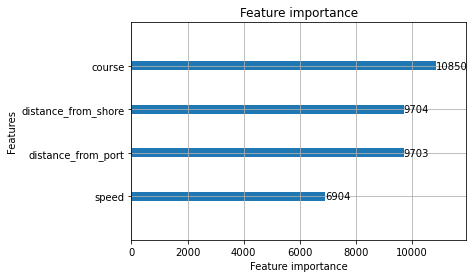

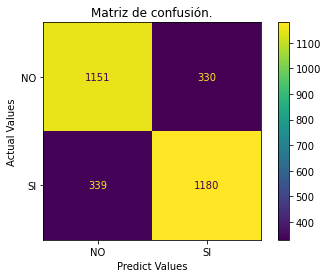

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.78     </td><td>0.78  </td><td>0.78    </td><td>0.78</td></tr>\n</tbody>\n</table>'

In [19]:
#parametros_optimos['max_depth'] = int(round(parametros_optimos['max_depth']))
parametros_optimos['num_leaves'] = int(round(parametros_optimos['num_leaves']))

dtrain = lgb.Dataset(data=X, label=y)
def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

def auc_score(preds,dtrain):
        labels = dtrain.get_label()
        return 'auc', roc_auc_score(labels, preds), True
        
#dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)
dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=auc_score)

#clf = lgb.fit(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)

lgb.plot_importance(dt)

y_pred = dt.predict(X_test)
#if>=0.5 ---> 1
#else ---->0
#rounding the values
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
y_pred = np.where(y_pred == 1, 'SI', 'NO')
#print(y_pred)

lgbm_precision_score, lgbm_recall_score, lgbm_accuracy_score, lgbm_f1_score = evaluate_model('light_gbm optimizacion bayesiana',y_test, y_pred)
#cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index


In [20]:
from IPython.display import Markdown as md
md(f'''| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  |{dt_precision_score:.3f}|	{dt_recall_score:.3f}|	{dt_accuracy_score:.3f}|	{dt_f1_score:.3f}|
|Random Forest       |{rf_precision_score:.3f} |	{rf_recall_score:.3f}|	{rf_accuracy_score:.3f}|	{rf_f1_score:.3f}|
|    SVM        | {svm_precision_score:.3f} |	{svm_recall_score:.3f}|	{svm_accuracy_score:.3f}|	{svm_f1_score:.3f}
| LightGBM      |{lgbm_precision_score:.3f}|	{lgbm_recall_score:.3f}|	{lgbm_accuracy_score:.3f}|	{lgbm_f1_score:.3f}|
'''
       )


| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  |0.715|	0.731|	0.716|	0.723|
|Random Forest       |0.786 |	0.794|	0.786|	0.790|
|    SVM        | 0.000 |	0.000|	0.494|	0.000
| LightGBM      |0.781|	0.777|	0.777|	0.779|
